# Data Preprocessing & EDA

## Attaching Resources

### Importing Necessary Libraries

In [5]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [6]:
ep = pd.read_csv('energy_production.csv', )

ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [7]:
ep_nrow = ep.shape[0]

In [8]:
def lost_record():

    ep_nrow_now = ep.shape[0]
    lost = ep_nrow - ep_nrow_now
    lost = (lost/ep_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [9]:
ep.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

#### Performing Typecasting

In [10]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### Performing Missing Value Imputation

In [11]:
def missing_percentage(ep):

    m = ep.isna().sum()
    total = int(ep.shape[0])

    for i in range(len(ep.columns)):
        percentage =round((m[i]/total)*100)

        print(str(ep.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [12]:
missing_percentage(ep)

temperature has 0 % missing value(0)
exhaust_vacuum has 0 % missing value(0)
amb_pressure has 0 % missing value(0)
r_humidity has 0 % missing value(0)
energy_production has 0 % missing value(0)


- No Missing Value Present

#### Finding Unique Values In Dataset

In [13]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [14]:
uni(ep)


 All Unique Value in temperature
[ 1.81  2.34  2.58 ... 35.56 35.77 37.11]
Total no of unique values 2773

 All Unique Value in exhaust_vacuum
[25.36 25.88 34.03 34.69 35.19 35.4  35.47 35.57 35.71 35.76 35.77 35.79
 35.85 36.08 36.18 36.24 36.25 36.3  36.43 36.54 36.66 36.71 36.99 37.14
 37.2  37.36 37.49 37.5  37.64 37.7  37.73 37.8  37.83 37.85 37.86 37.87
 37.9  37.91 37.92 38.01 38.06 38.08 38.16 38.18 38.25 38.28 38.38 38.44
 38.47 38.5  38.52 38.53 38.56 38.58 38.62 38.68 38.73 38.78 38.91 38.92
 39.   39.04 39.08 39.1  39.13 39.16 39.18 39.22 39.28 39.3  39.31 39.33
 39.35 39.37 39.39 39.4  39.42 39.48 39.52 39.53 39.54 39.58 39.59 39.61
 39.63 39.64 39.66 39.69 39.72 39.81 39.82 39.85 39.9  39.96 39.99 40.
 40.02 40.03 40.05 40.07 40.1  40.11 40.12 40.2  40.22 40.23 40.24 40.27
 40.33 40.35 40.43 40.46 40.55 40.56 40.6  40.62 40.64 40.66 40.67 40.69
 40.71 40.72 40.73 40.75 40.77 40.78 40.79 40.8  40.81 40.83 40.89 40.92
 40.96 41.01 41.03 41.04 41.06 41.1  41.14 41.16 41.17 

### Checking for Duplicated Values

In [16]:
ep[ep.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

In [17]:
ep[ep.duplicated()].shape[0]

41

In [18]:
ep.drop_duplicates(inplace = True)

In [19]:
lost_record()

We lost 0.43 % data


In [20]:
ep[ep.duplicated()]

Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []

- There is no duplicate vale in are dataset

#### Reindexing Columns

In [21]:
ep.reset_index(inplace=True)
ep.drop(columns=['index'], inplace=True)

ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9522        17.10           49.69       1005.53       81.82             457.32
9523        24.73           65.34       1015.42       52.80             446.92
9524        30.44           56.24       1005.19       56.24             429.34
9525        23.00           66.05       1020.61       80.29             421.57
9526        17.75           49.25       1020.86       63.67             454.41

[9527 rows x 5 columns]

### Visualizing The Data

#### Ploting Temperature

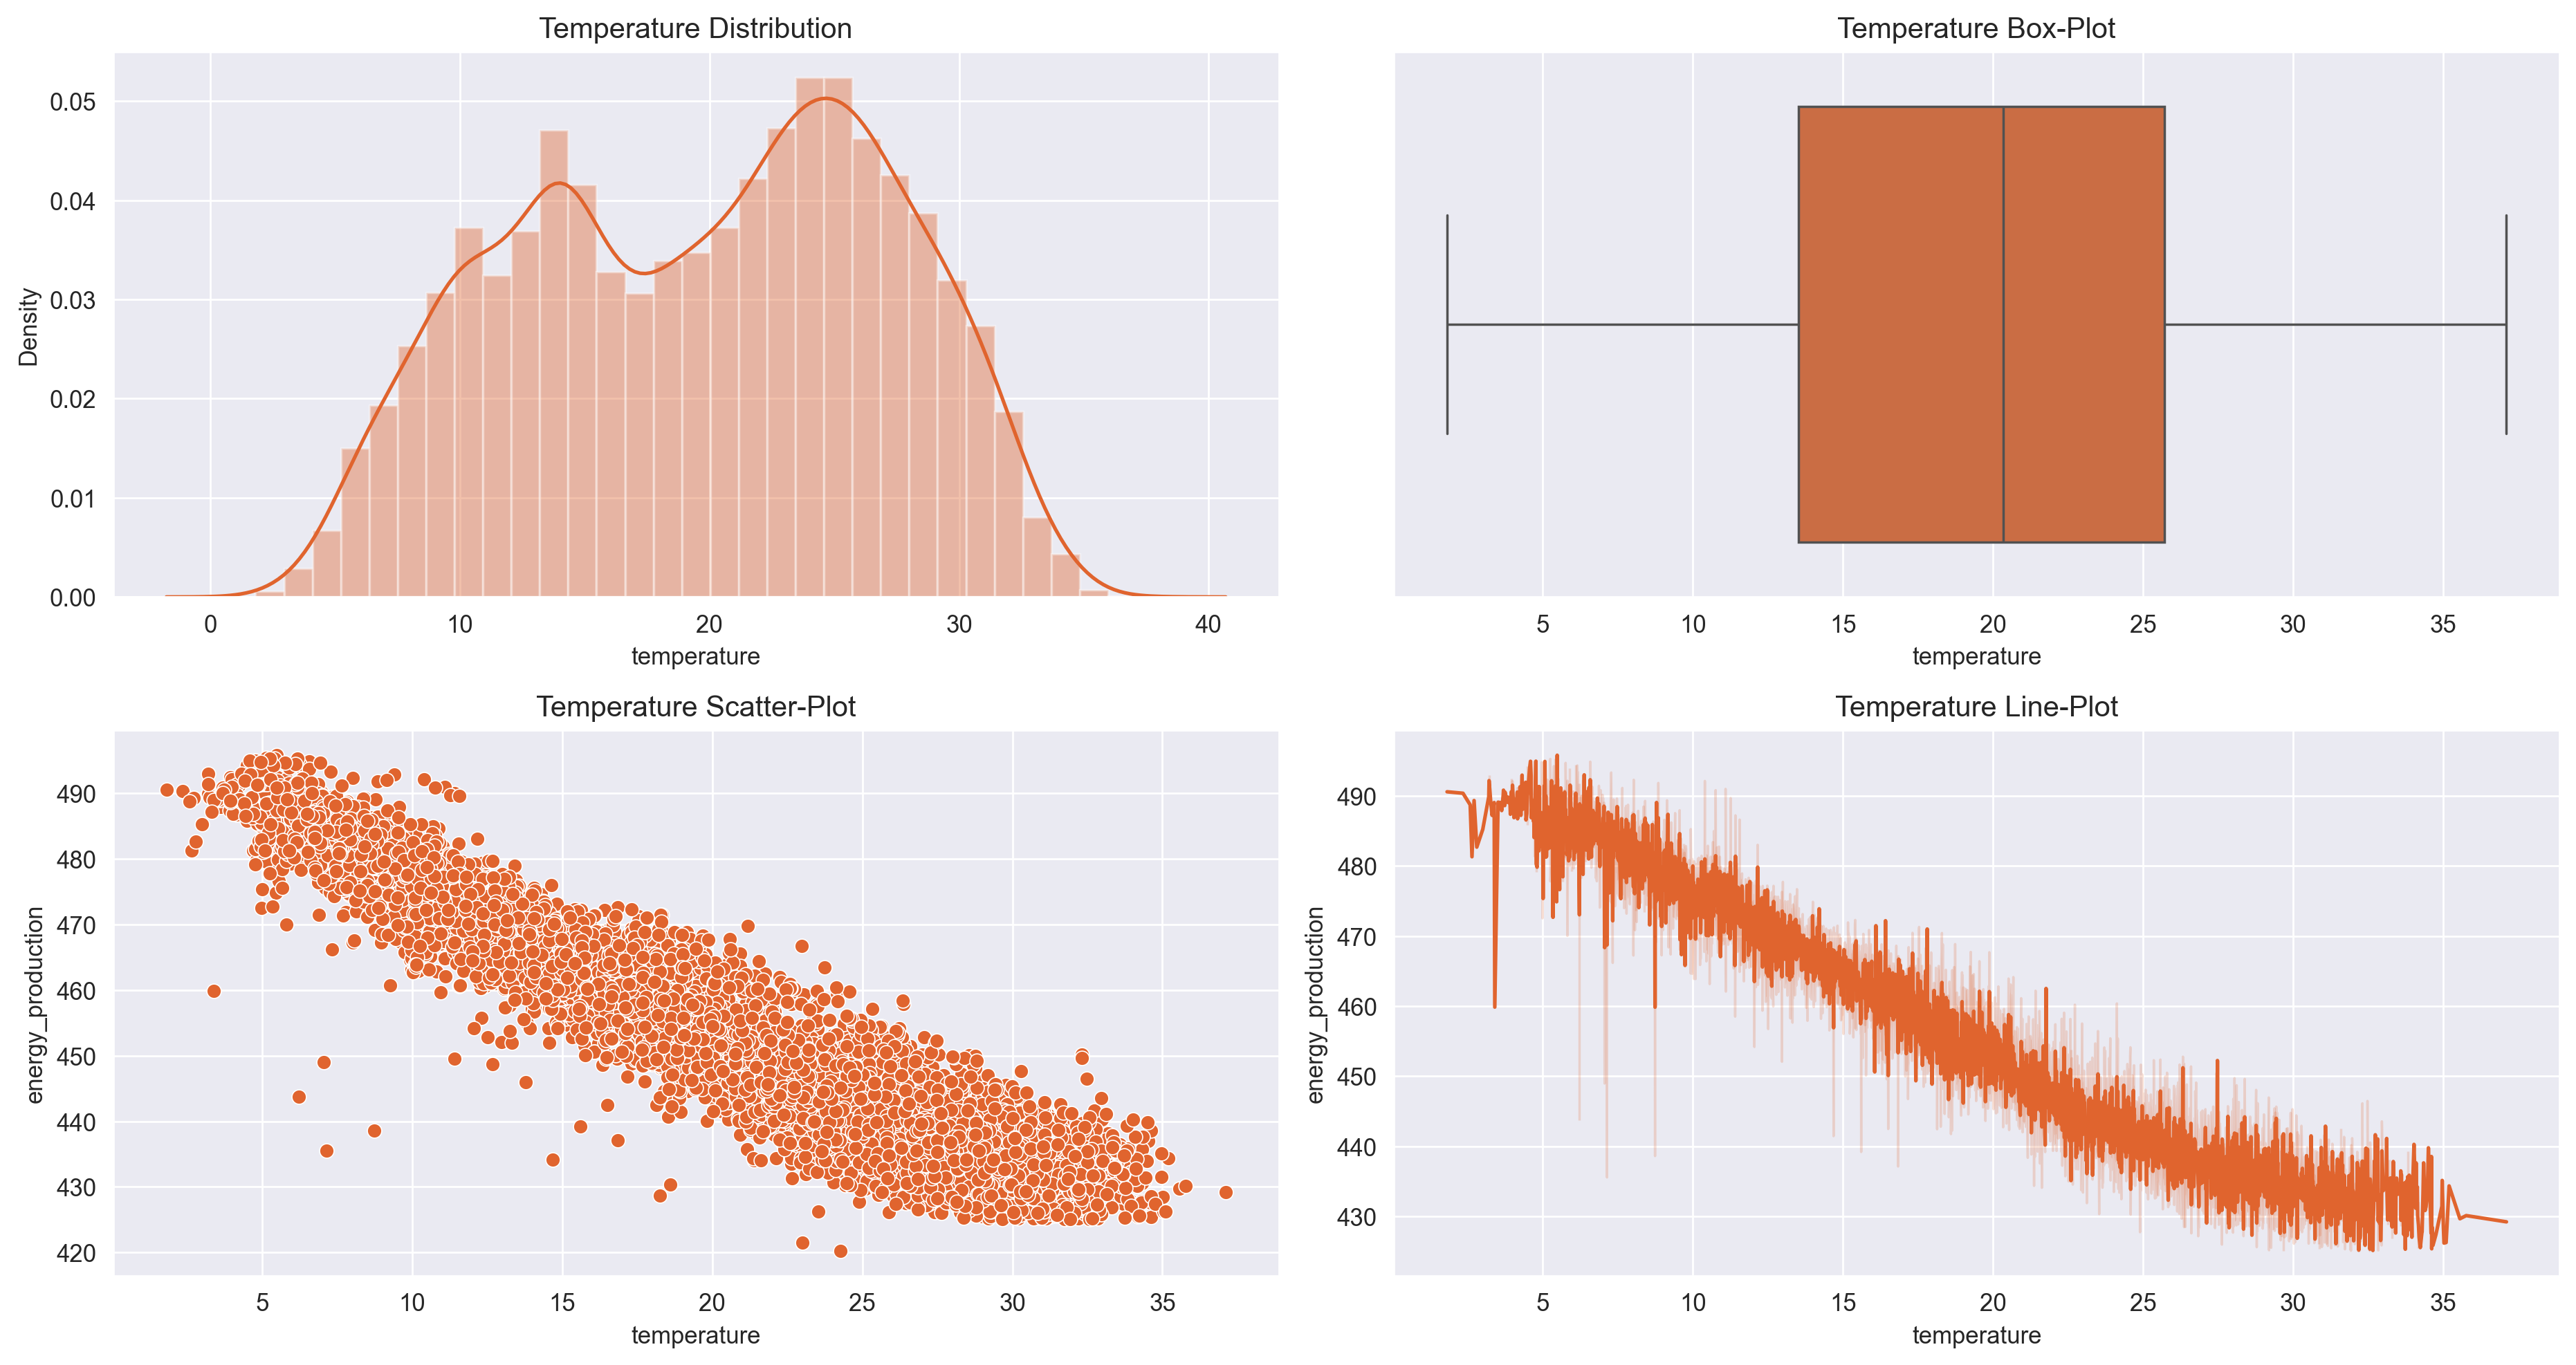

In [22]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0], title = 'Temperature Distribution')
sns.distplot(ep['temperature'], ax = ax[0,0], color = '#E0642E')

plt.setp(ax[0,1], title = 'Temperature Box-Plot')
sns.boxplot(ep['temperature'], orient = 'h', ax = ax[0,1], color = '#E0642E')

plt.setp(ax[1,0], title = 'Temperature Scatter-Plot')
sns.scatterplot(x = 'temperature', y = 'energy_production', data = ep , ax = ax[1,0], color = '#E0642E')

plt.setp(ax[1,1], title = 'Temperature Line-Plot')
sns.lineplot(x = 'temperature', y = 'energy_production', data = ep , ax = ax[1,1], color = '#E0642E')

plt.tight_layout()

#### Ploting Exhaust Vacuum

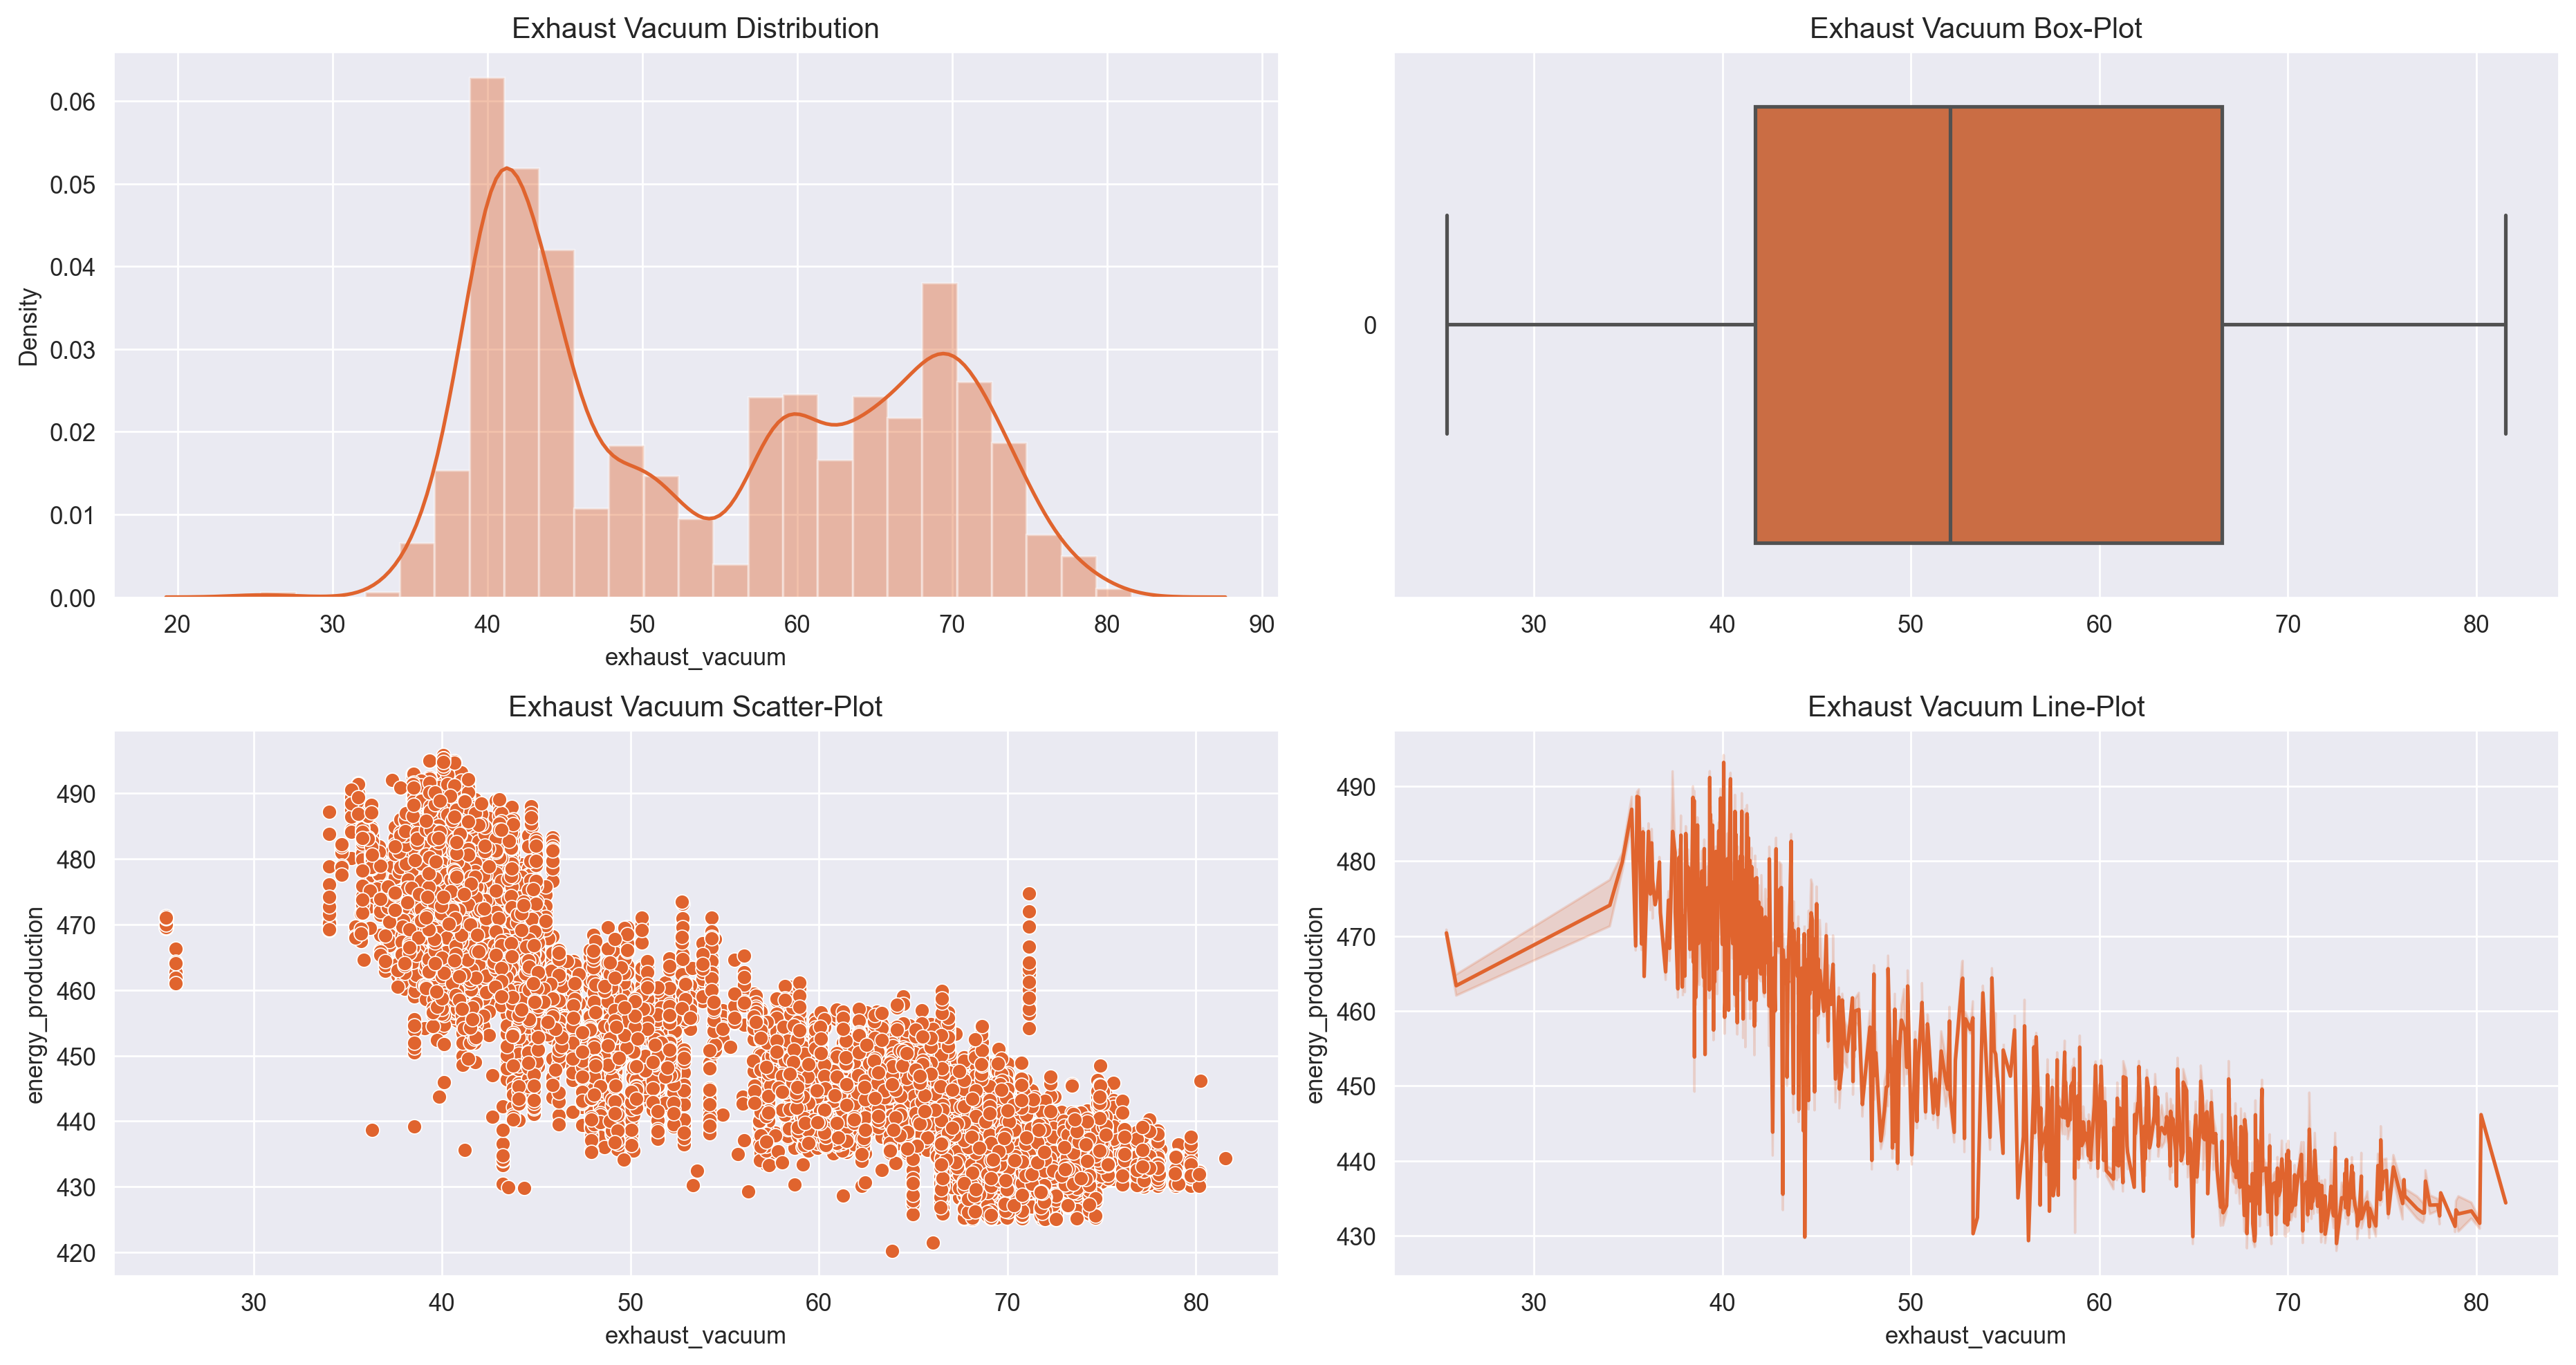

In [18]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0], title = 'Exhaust Vacuum Distribution')
sns.distplot(ep['exhaust_vacuum'], ax = ax[0,0], color = '#E0642E')

plt.setp(ax[0,1], title = 'Exhaust Vacuum Box-Plot')
sns.boxplot(ep['exhaust_vacuum'], orient = 'h', ax = ax[0,1], color = '#E0642E')

plt.setp(ax[1,0], title = 'Exhaust Vacuum Scatter-Plot')
sns.scatterplot(x = 'exhaust_vacuum', y = 'energy_production', data = ep , ax = ax[1,0], color = '#E0642E')

plt.setp(ax[1,1], title = 'Exhaust Vacuum Line-Plot')
sns.lineplot(x = 'exhaust_vacuum', y = 'energy_production', data = ep , ax = ax[1,1], color = '#E0642E')

plt.tight_layout()

#### Ploting Ambient Pressure

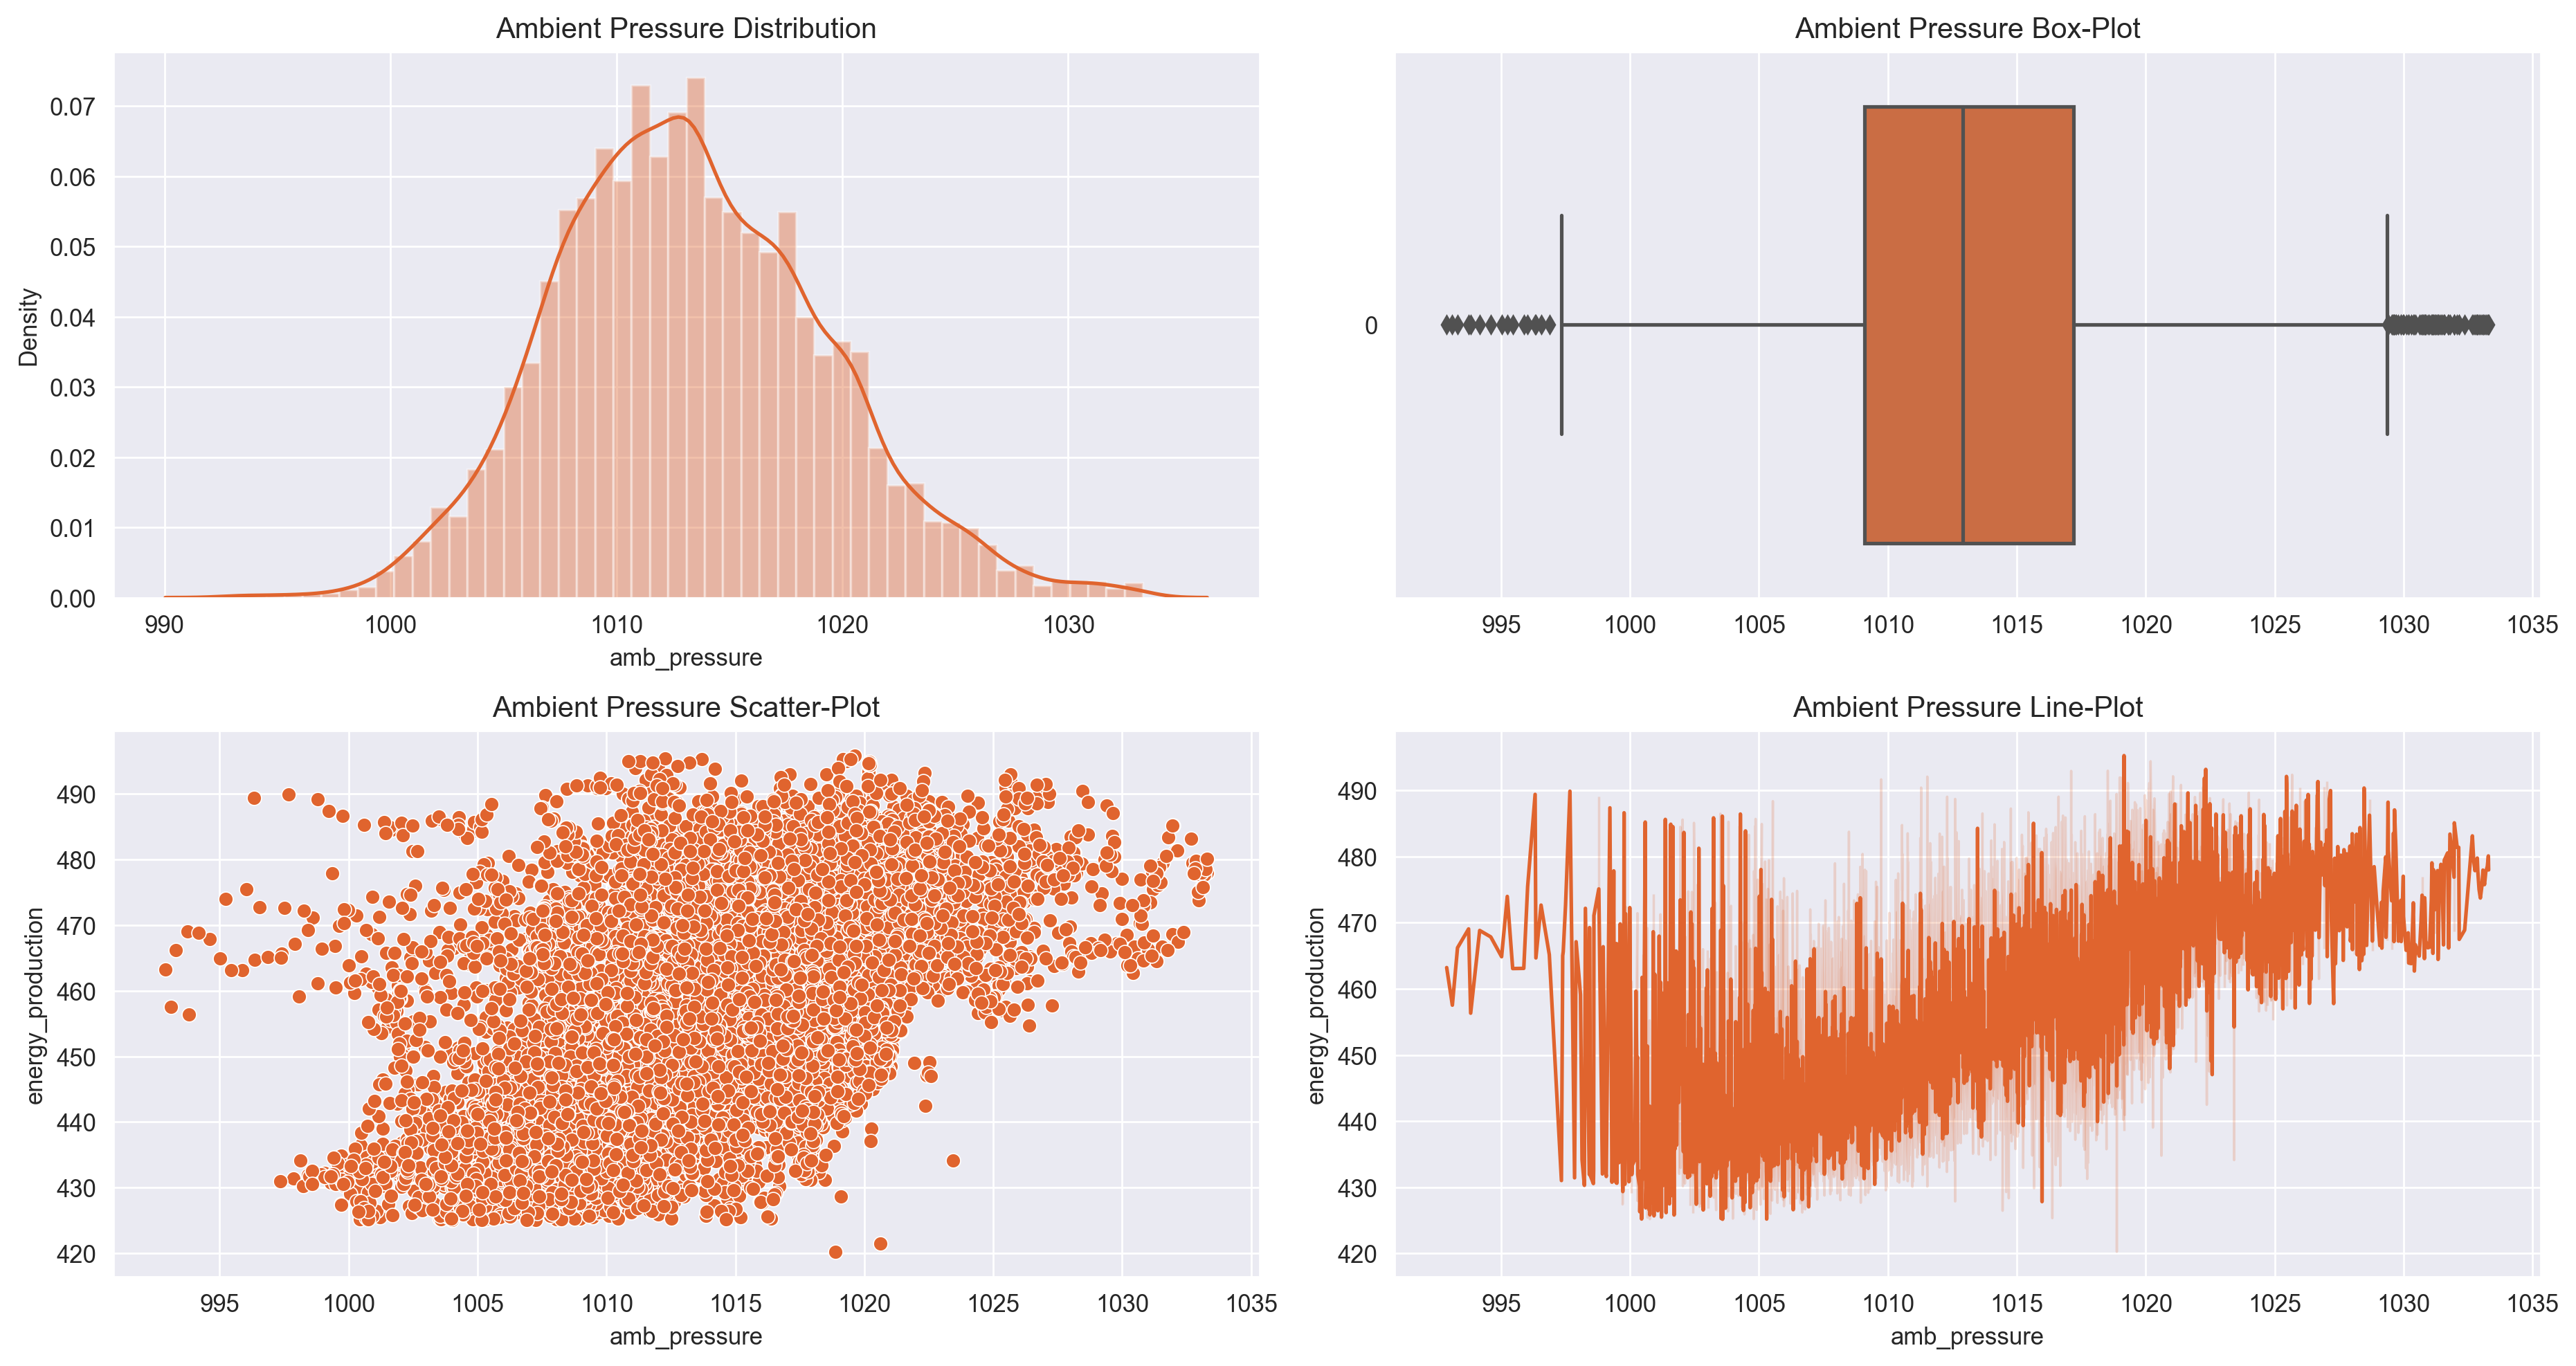

In [19]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0], title = 'Ambient Pressure Distribution')
sns.distplot(ep['amb_pressure'], ax = ax[0,0], color = '#E0642E')

plt.setp(ax[0,1], title = 'Ambient Pressure Box-Plot')
sns.boxplot(ep['amb_pressure'], orient = 'h', ax = ax[0,1], color = '#E0642E')

plt.setp(ax[1,0], title = 'Ambient Pressure Scatter-Plot')
sns.scatterplot(x = 'amb_pressure', y = 'energy_production', data = ep , ax = ax[1,0], color = '#E0642E')

plt.setp(ax[1,1], title = 'Ambient Pressure Line-Plot')
sns.lineplot(x = 'amb_pressure', y = 'energy_production', data = ep , ax = ax[1,1], color = '#E0642E')

plt.tight_layout()

#### Ploting Relative Humidity

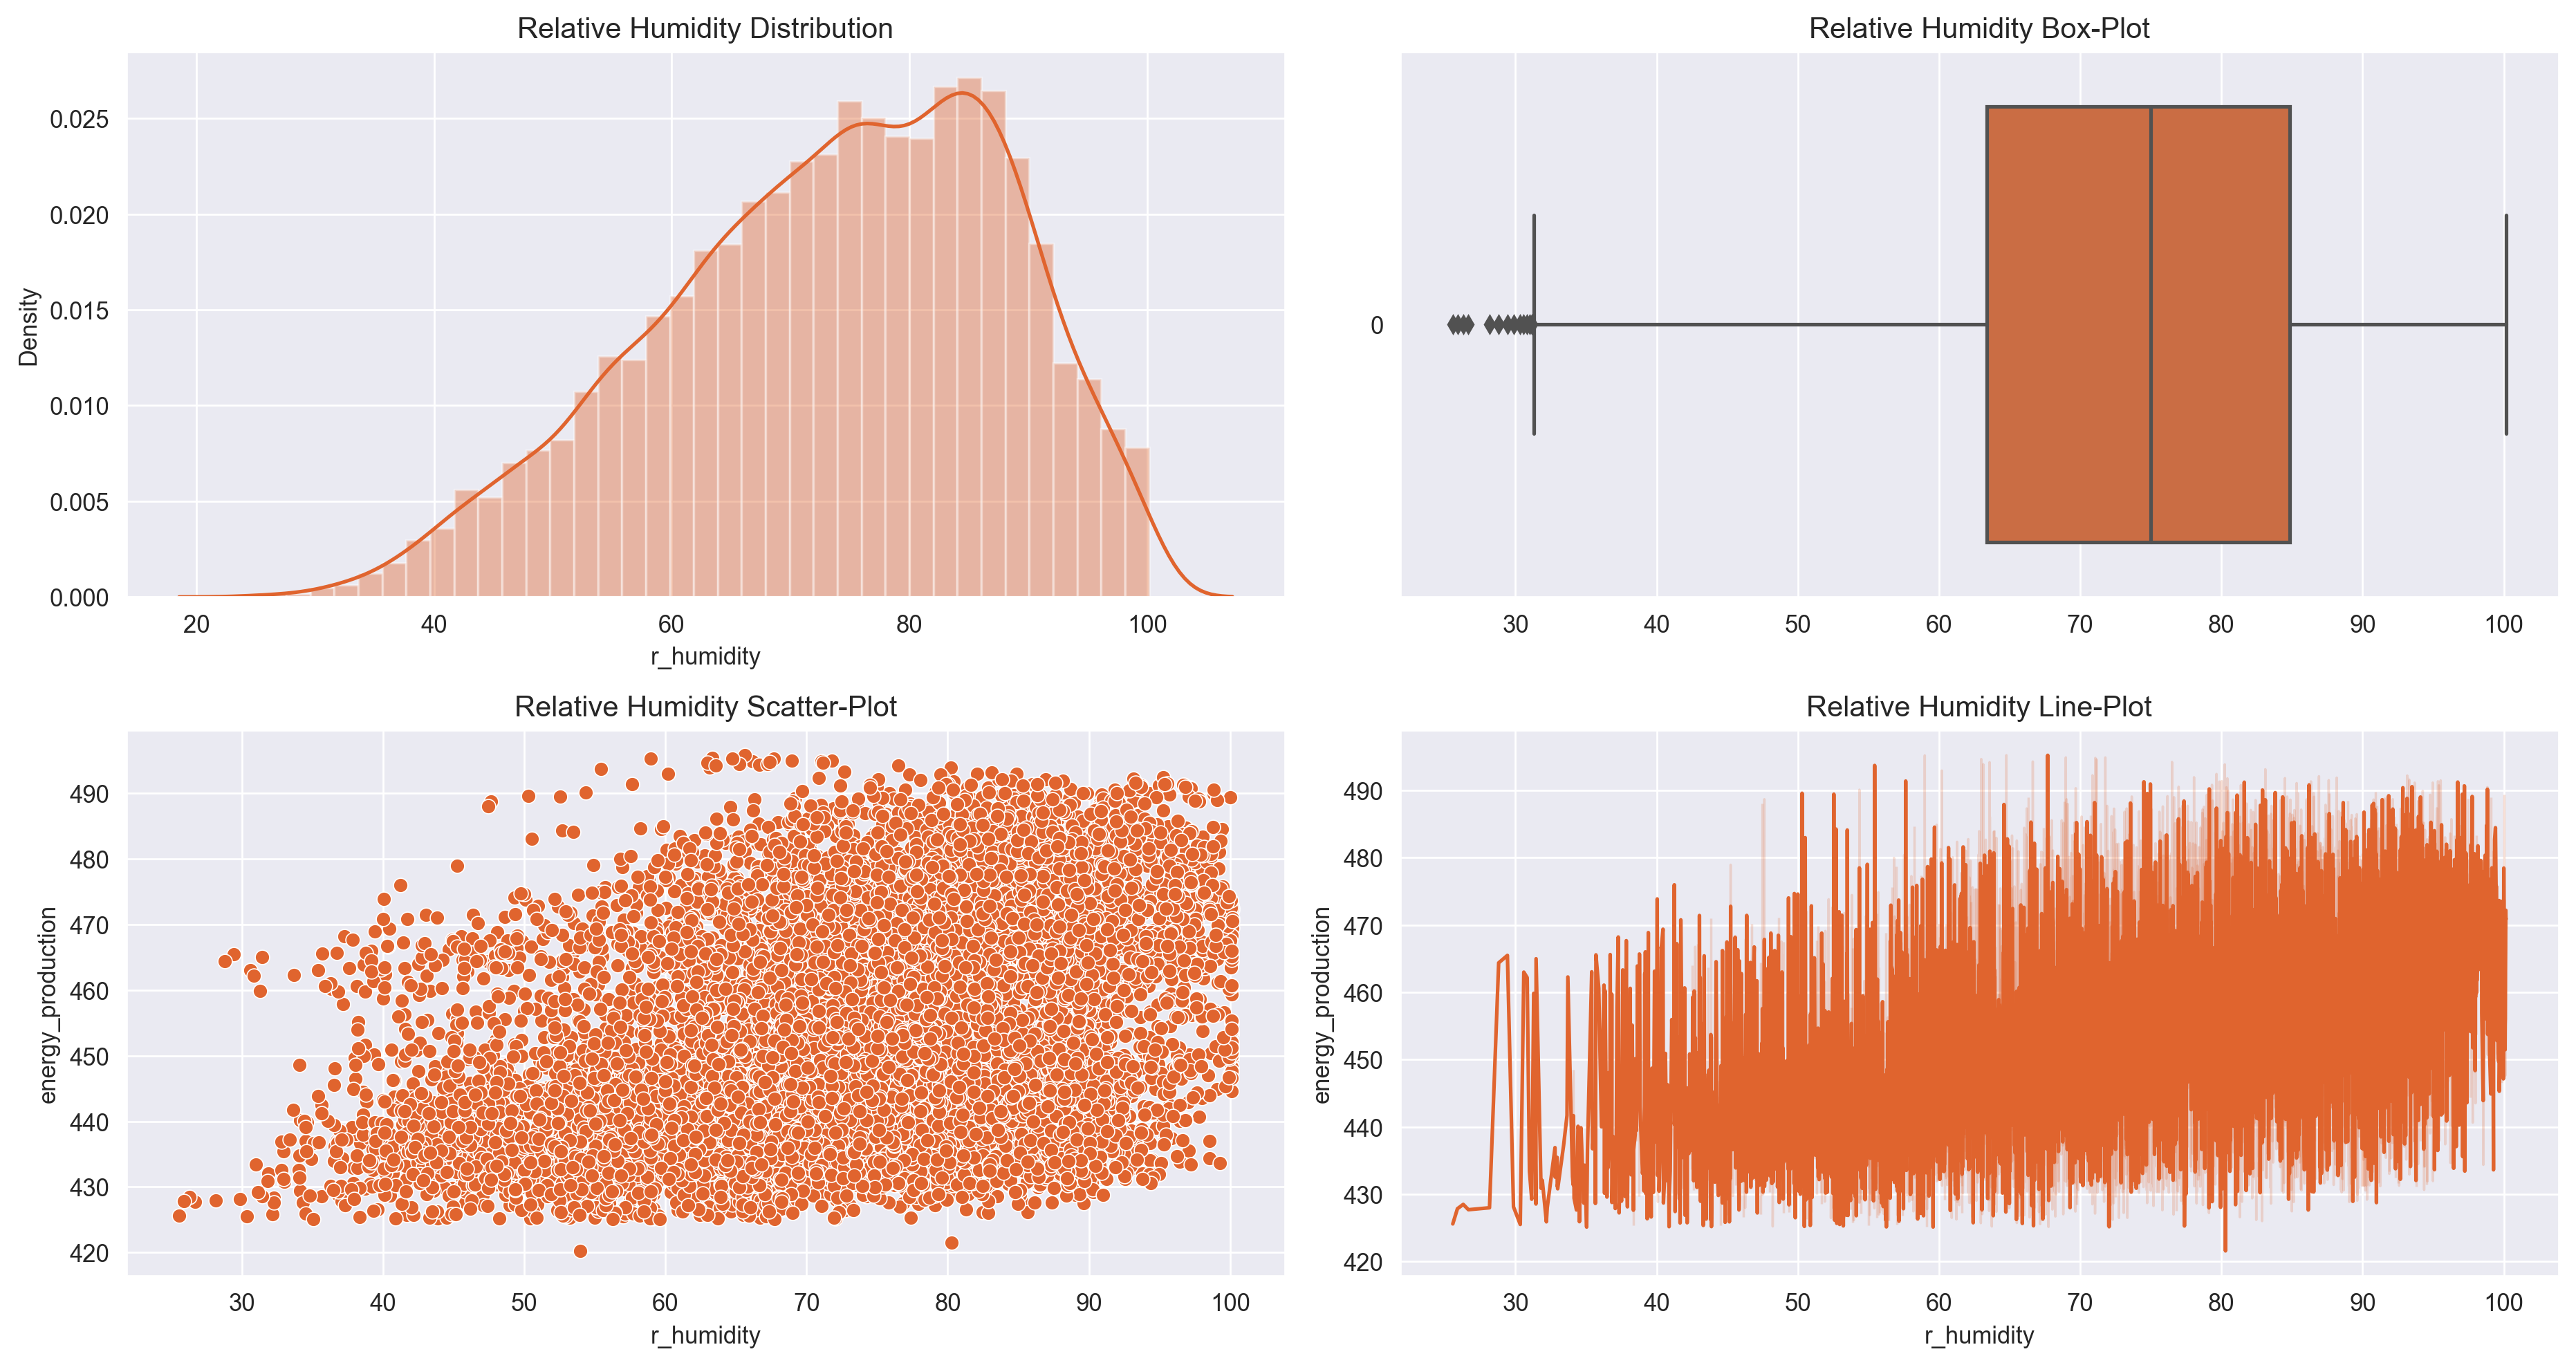

In [20]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0], title = 'Relative Humidity Distribution')
sns.distplot(ep['r_humidity'], ax = ax[0,0], color = '#E0642E')

plt.setp(ax[0,1], title = 'Relative Humidity Box-Plot')
sns.boxplot(ep['r_humidity'], orient = 'h', ax = ax[0,1], color = '#E0642E')

plt.setp(ax[1,0], title = 'Relative Humidity Scatter-Plot')
sns.scatterplot(x = 'r_humidity', y = 'energy_production', data = ep , ax = ax[1,0], color = '#E0642E')

plt.setp(ax[1,1], title = 'Relative Humidity Line-Plot')
sns.lineplot(x = 'r_humidity', y = 'energy_production', data = ep , ax = ax[1,1], color = '#E0642E')

plt.tight_layout()

### Correlation Analysis

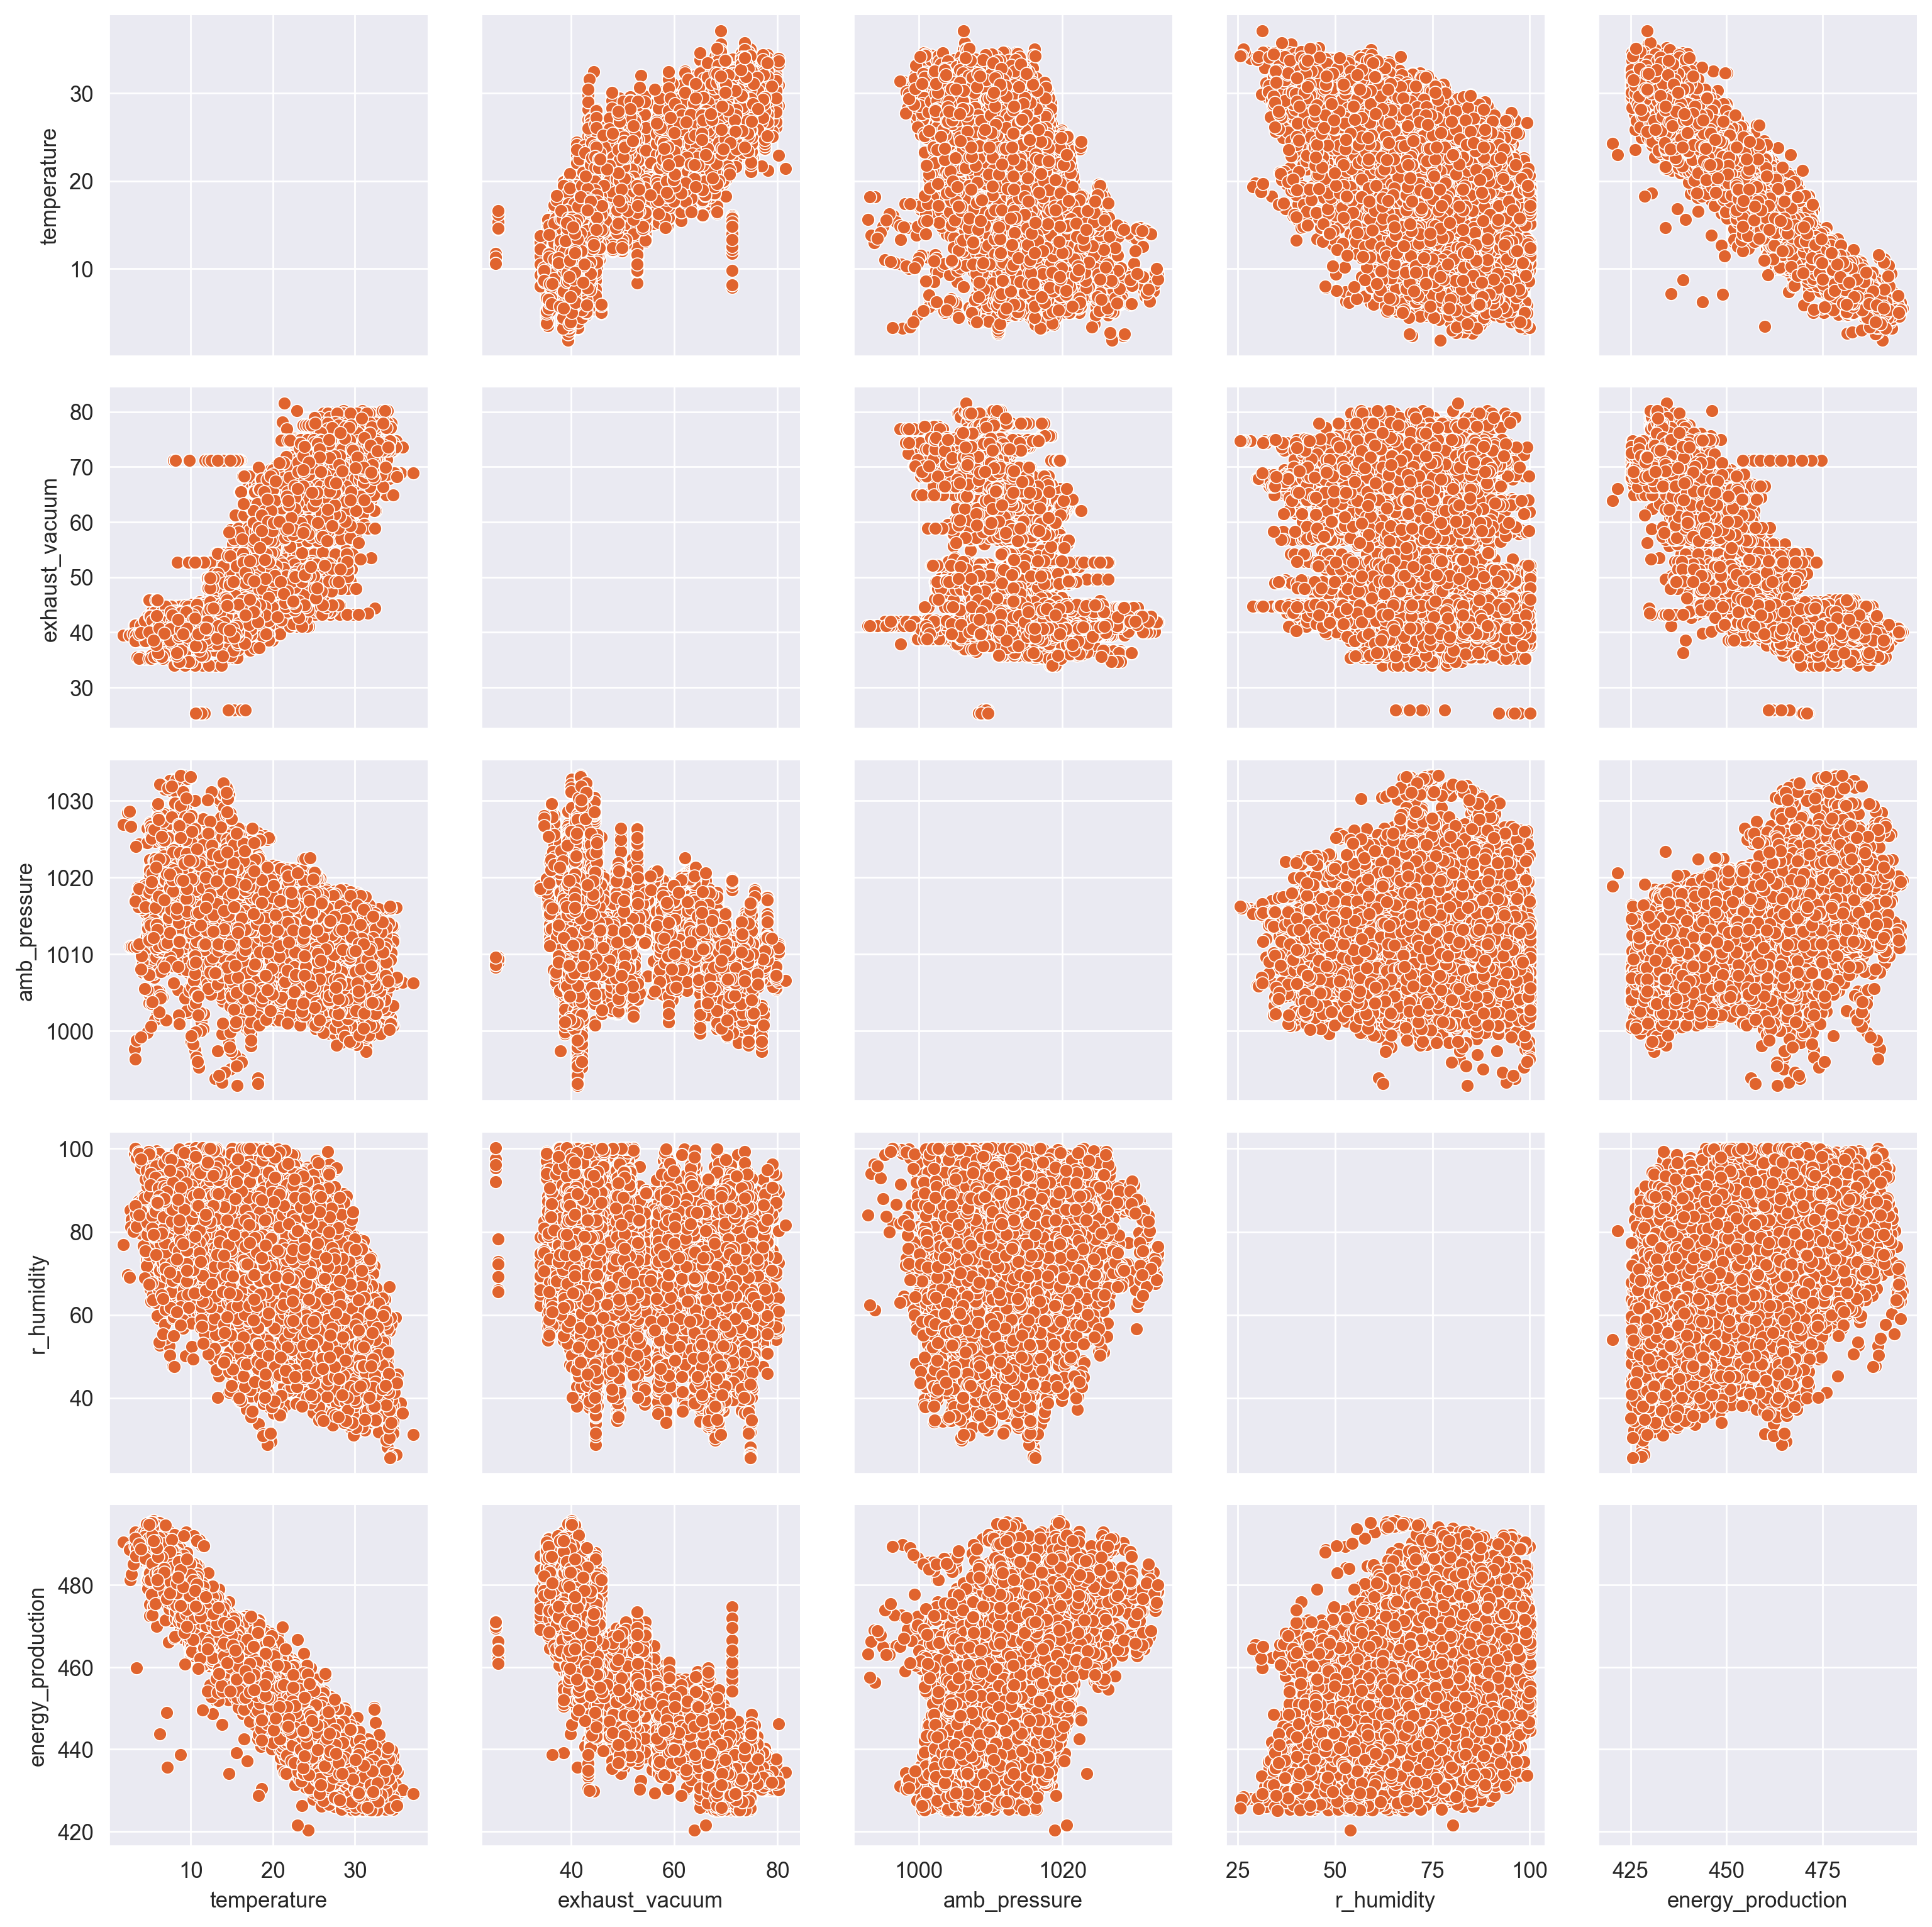

In [21]:
g = sns.PairGrid(ep)
g.map_upper(sns.scatterplot,color='#E0642E')
g.map_lower(sns.scatterplot, color='#E0642E')

<Axes: >

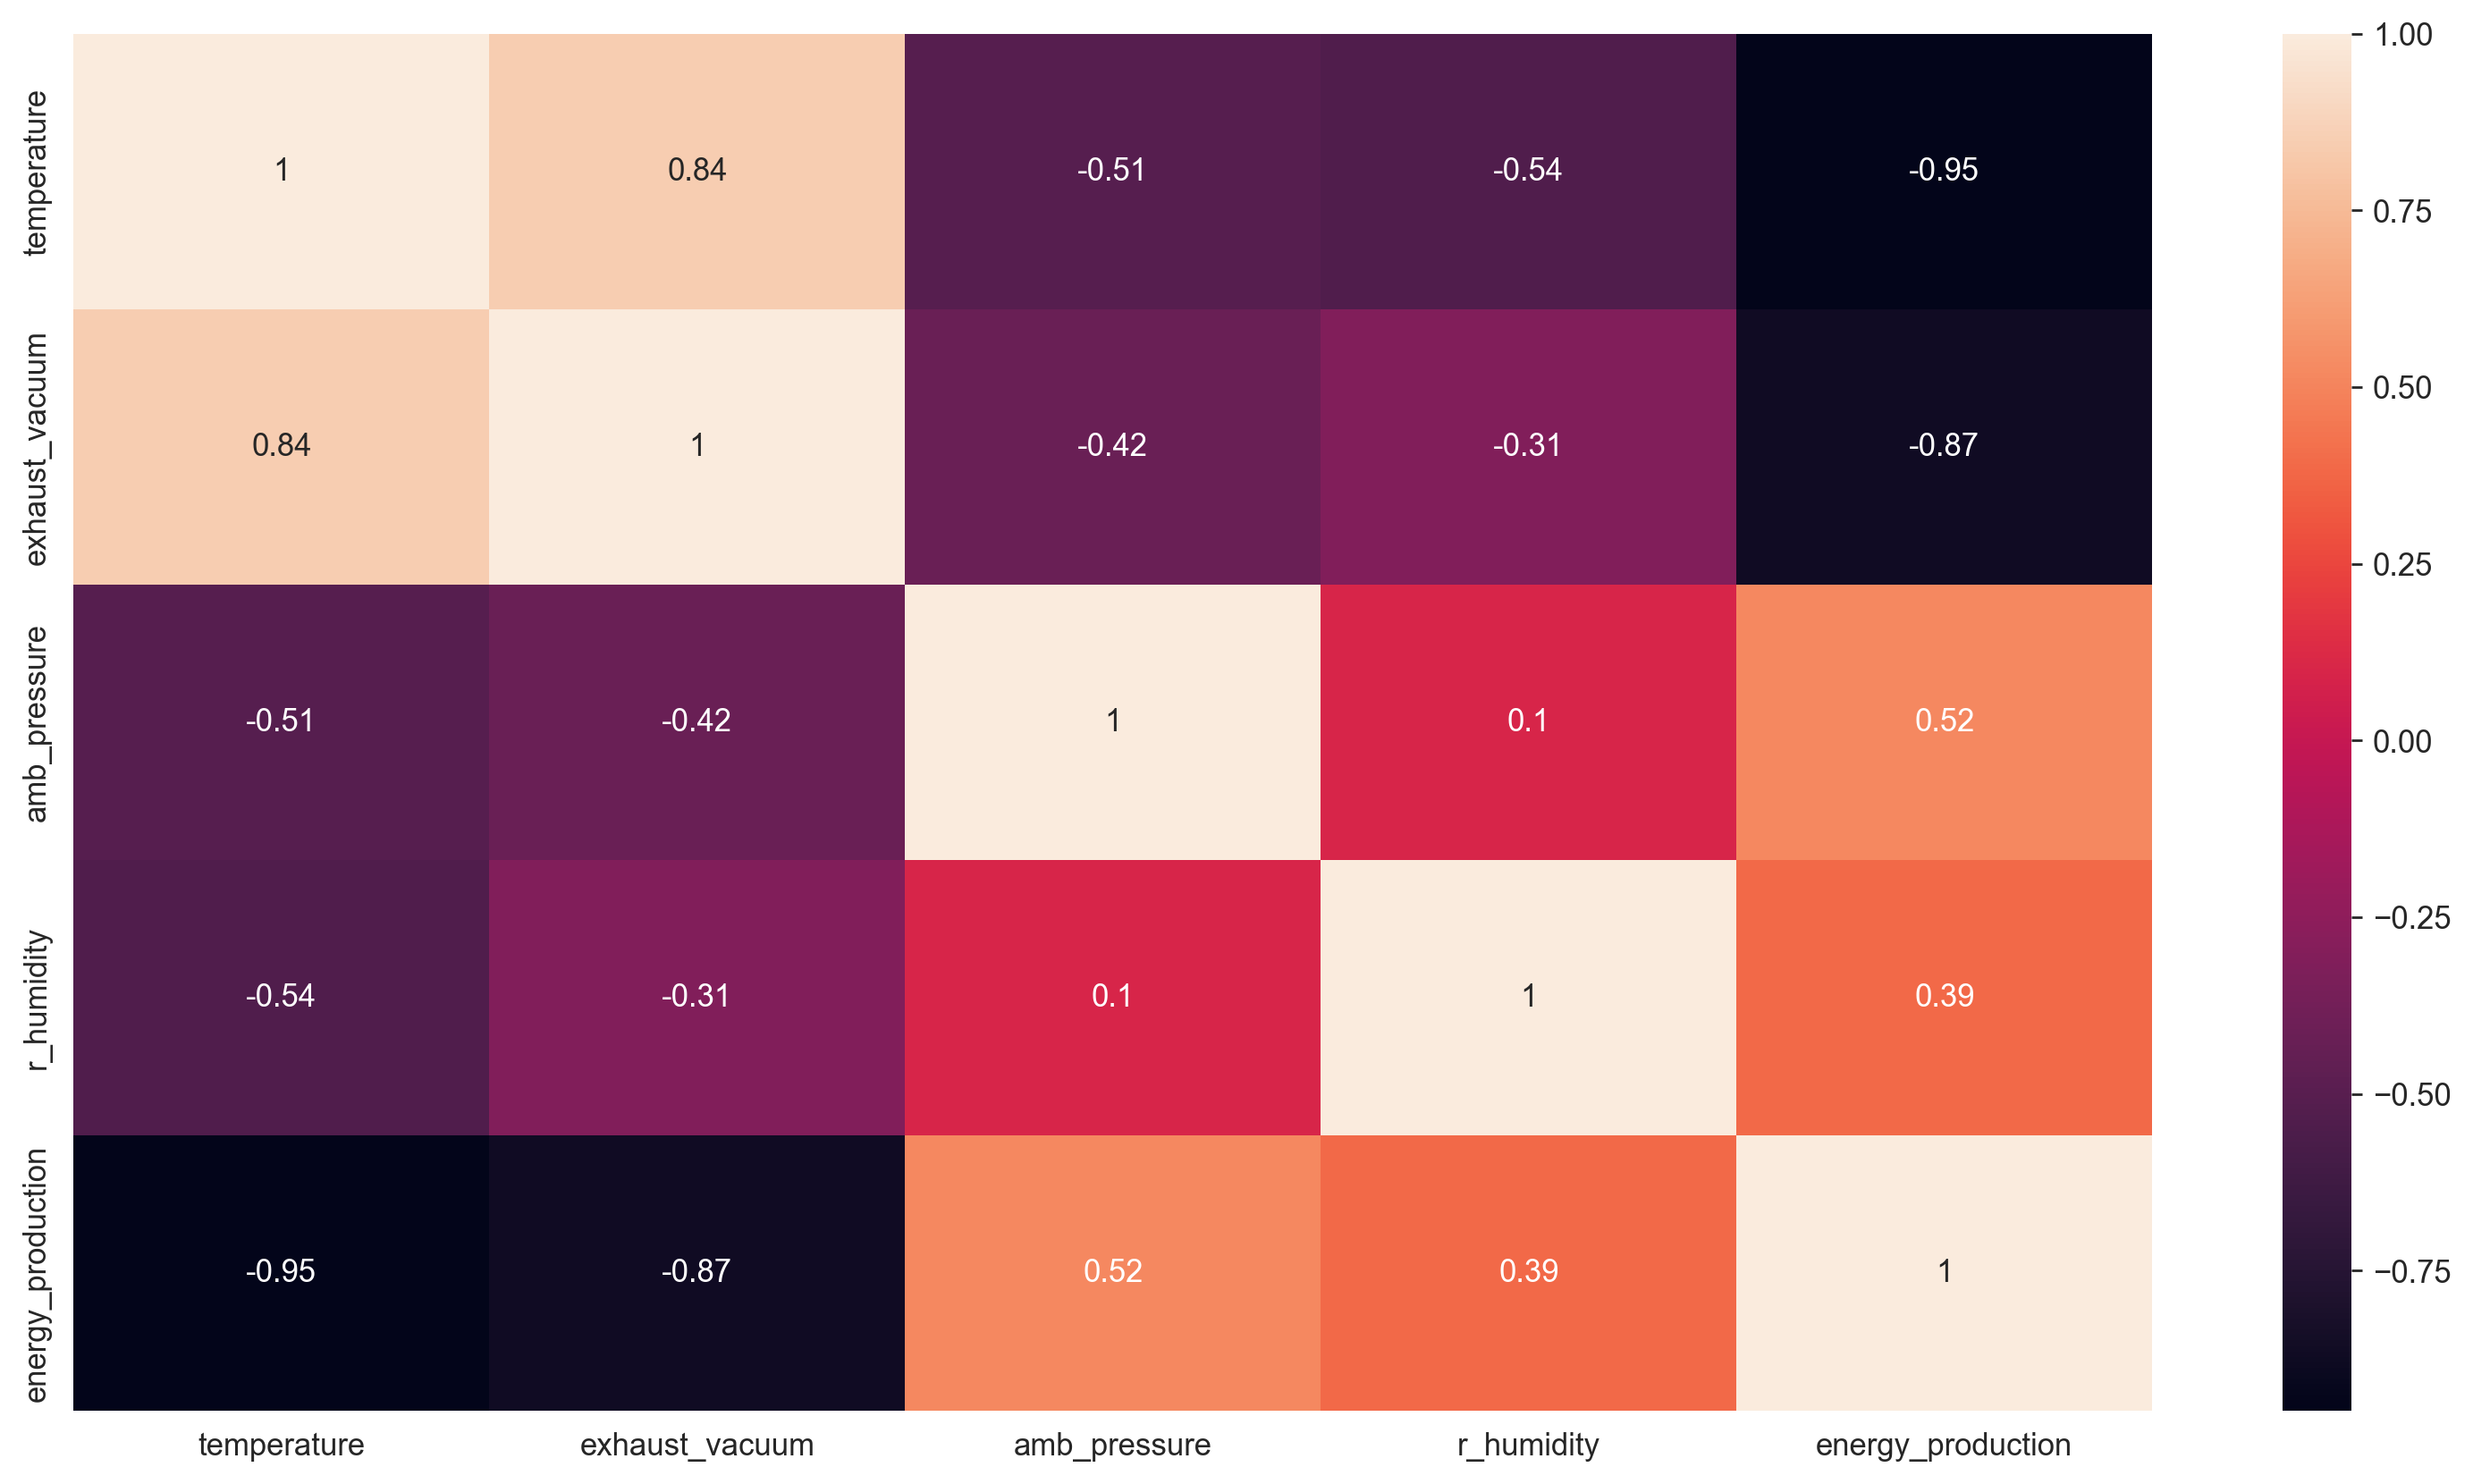

In [22]:
sns.heatmap(ep.corr(), annot = True)

### Outlier Detection

In [23]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100
        
        percentage = round(percentage, 2)

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [24]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [25]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Resizing Figsize

In [26]:
plt.rcParams['figure.figsize'] = (12,2)

#### Outlier Percentage (Before)

In [27]:
outlier_percentage(ep)

temperature : 0.0 %
exhaust_vacuum : 0.0 %
amb_pressure : 0.96 %
r_humidity : 0.14 %
energy_production : 0.0 %


#### Replacing Outlier in Ambient Pressure Column

<Axes: >

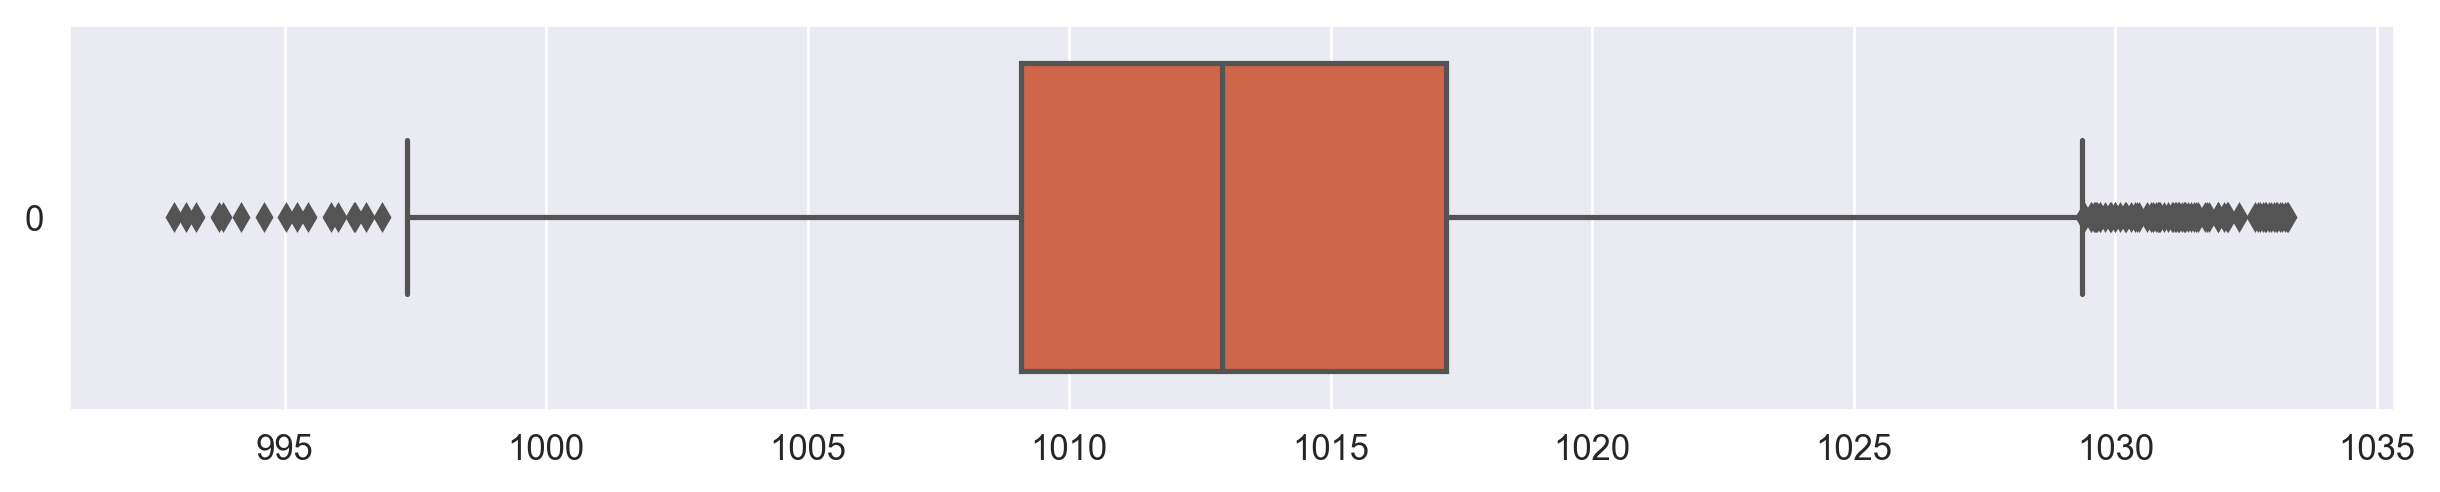

In [28]:
sns.boxplot(ep['amb_pressure'], orient = 'h', color = '#e55934')

In [29]:
replace_outlier_extream(ep, 'amb_pressure')

<Axes: >

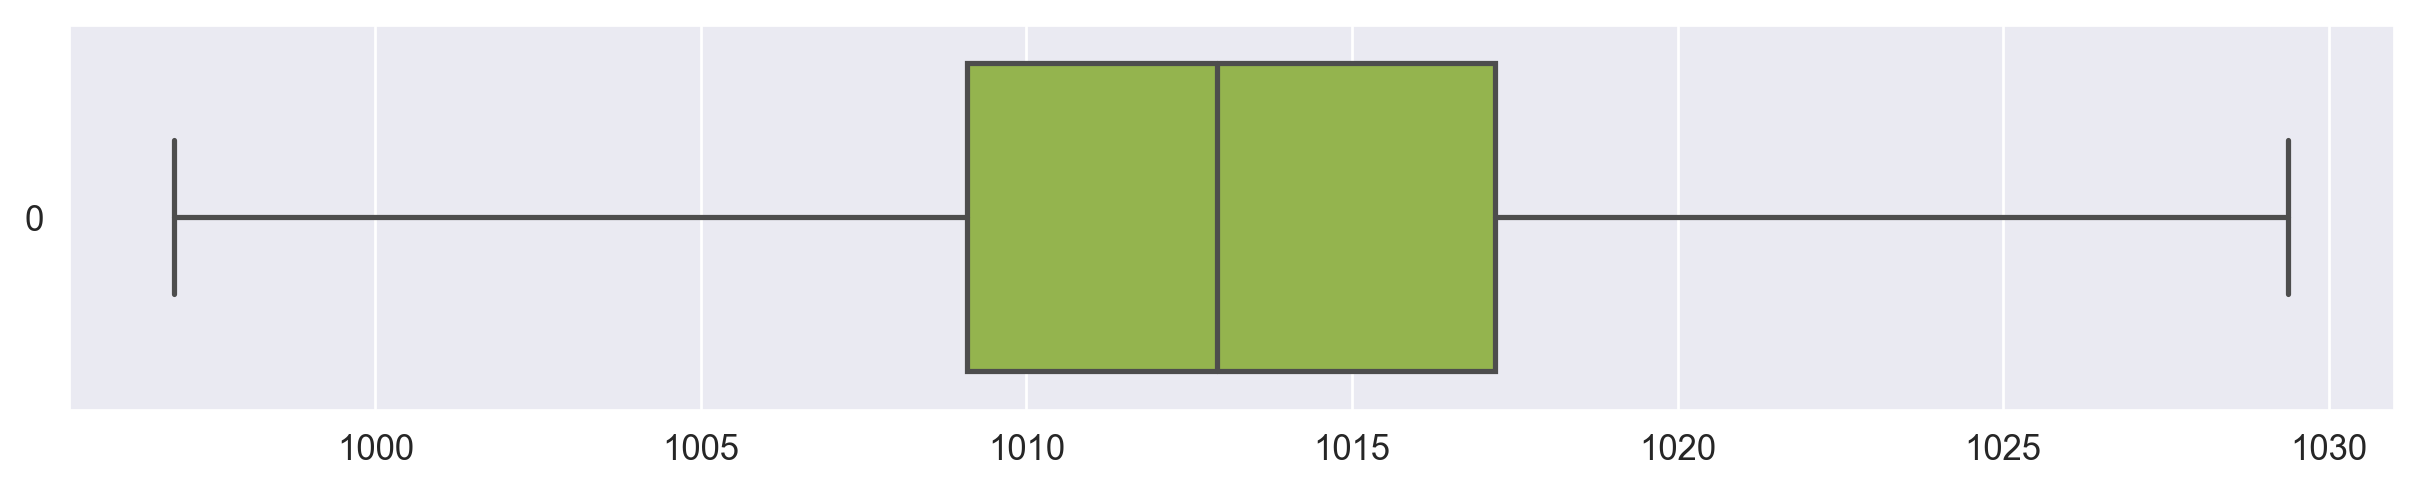

In [30]:
sns.boxplot(ep['amb_pressure'], orient = 'h', color = '#9bc53d')

#### Replacing Outlier in Relative Humidity Column

<Axes: >

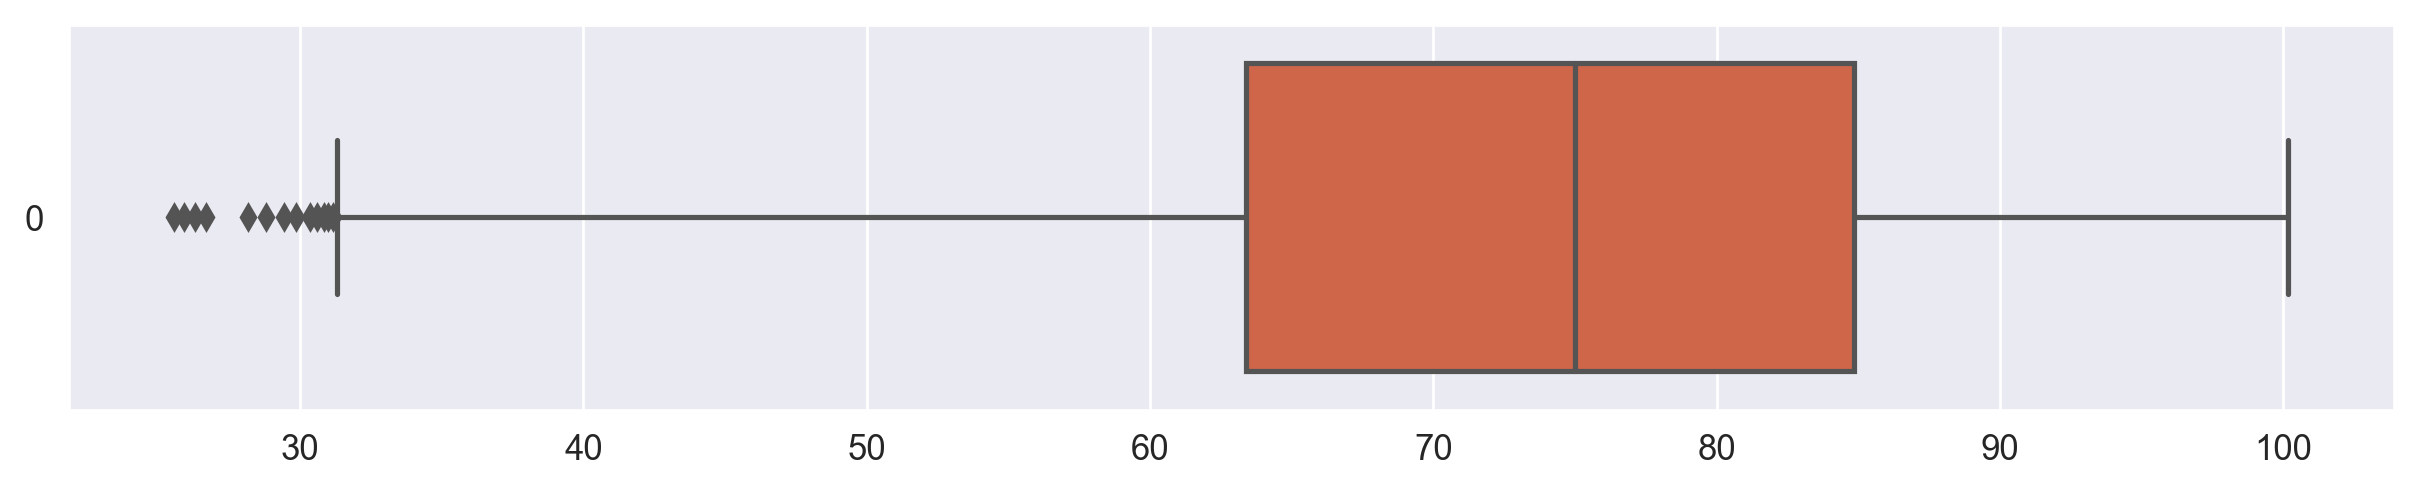

In [31]:
sns.boxplot(ep['r_humidity'], orient = 'h', color = '#e55934')

In [32]:
replace_outlier_extream(ep, 'r_humidity')

<Axes: >

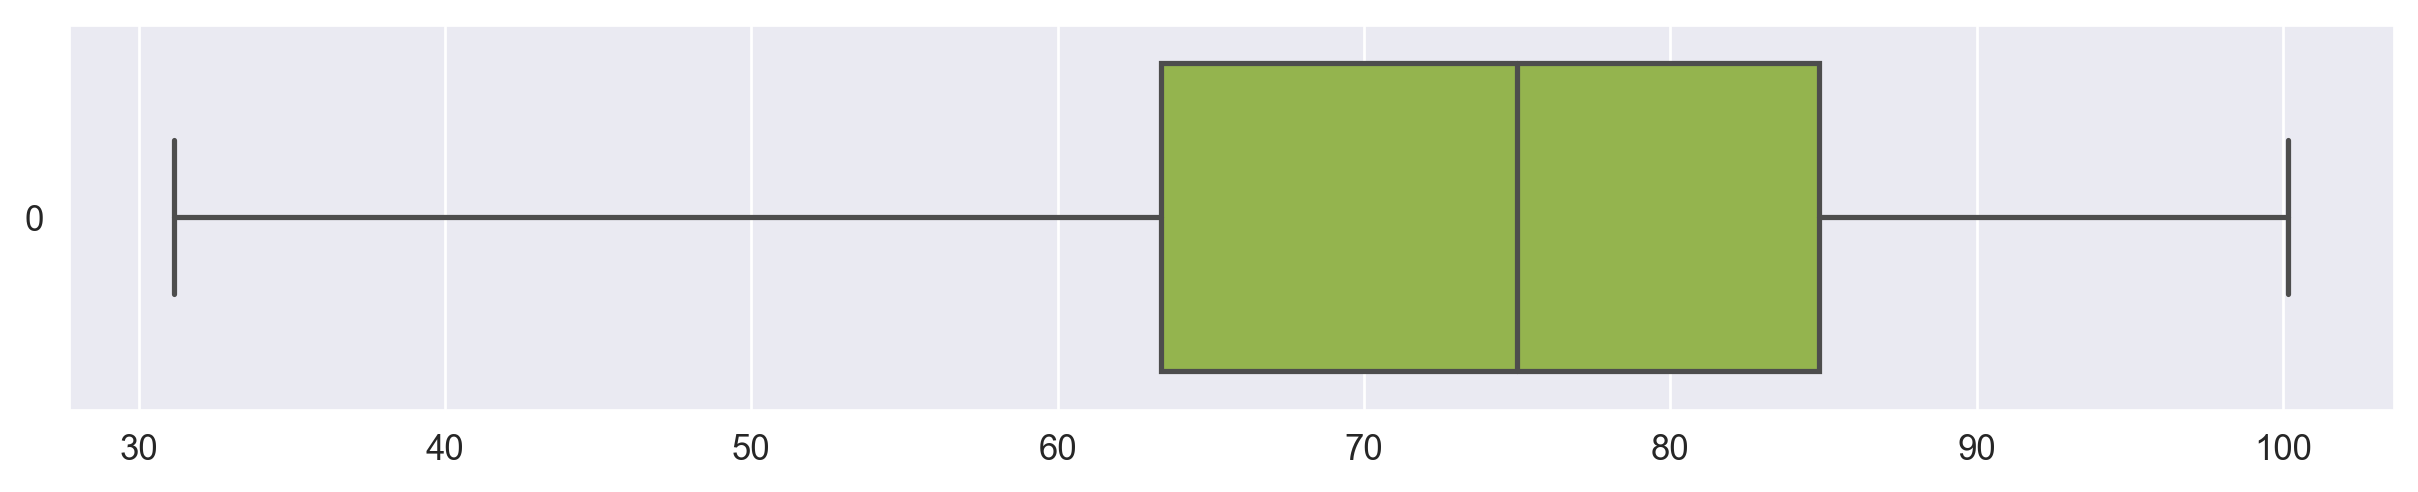

In [33]:
sns.boxplot(ep['r_humidity'], orient = 'h', color = '#9bc53d')

#### Outlier Percentage (After)

In [34]:
outlier_percentage(ep)

temperature : 0.0 %
exhaust_vacuum : 0.0 %
amb_pressure : 0.0 %
r_humidity : 0.0 %
energy_production : 0.0 %


### Tranforming Dataset

#### Tranforming Temperature

In [35]:
ep['log_temp'] = ep['temperature'].apply(mt.log)
ep['sqrt_temp'] = ep['temperature'].apply(mt.sqrt)

ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
0            9.59           38.56       1017.01       60.10   
1           12.04           42.34       1019.72       94.67   
2           13.87           45.08       1024.42       81.69   
3           13.72           54.30       1017.89       79.08   
4           15.14           49.64       1023.78       75.00   
...           ...             ...           ...         ...   
9522        17.10           49.69       1005.53       81.82   
9523        24.73           65.34       1015.42       52.80   
9524        30.44           56.24       1005.19       56.24   
9525        23.00           66.05       1020.61       80.29   
9526        17.75           49.25       1020.86       63.67   

      energy_production  log_temp  sqrt_temp  
0                481.30  2.260721   3.096773  
1                465.36  2.488234   3.469870  
2                465.48  2.629728   3.724245  
3                467.05  2.618855   3.704052  
4                463.58  2.717340   3.891015  
...                 ...       ...        ...  
9522             457.32  2.839078   4.135215  
9523             446.92  3.208017   4.972927  
9524             429.34  3.415758   5.517246  
9525             421.57  3.135494   4.795832  
9526             454.41  2.876386   4.213075  

[9527 rows x 7 columns]

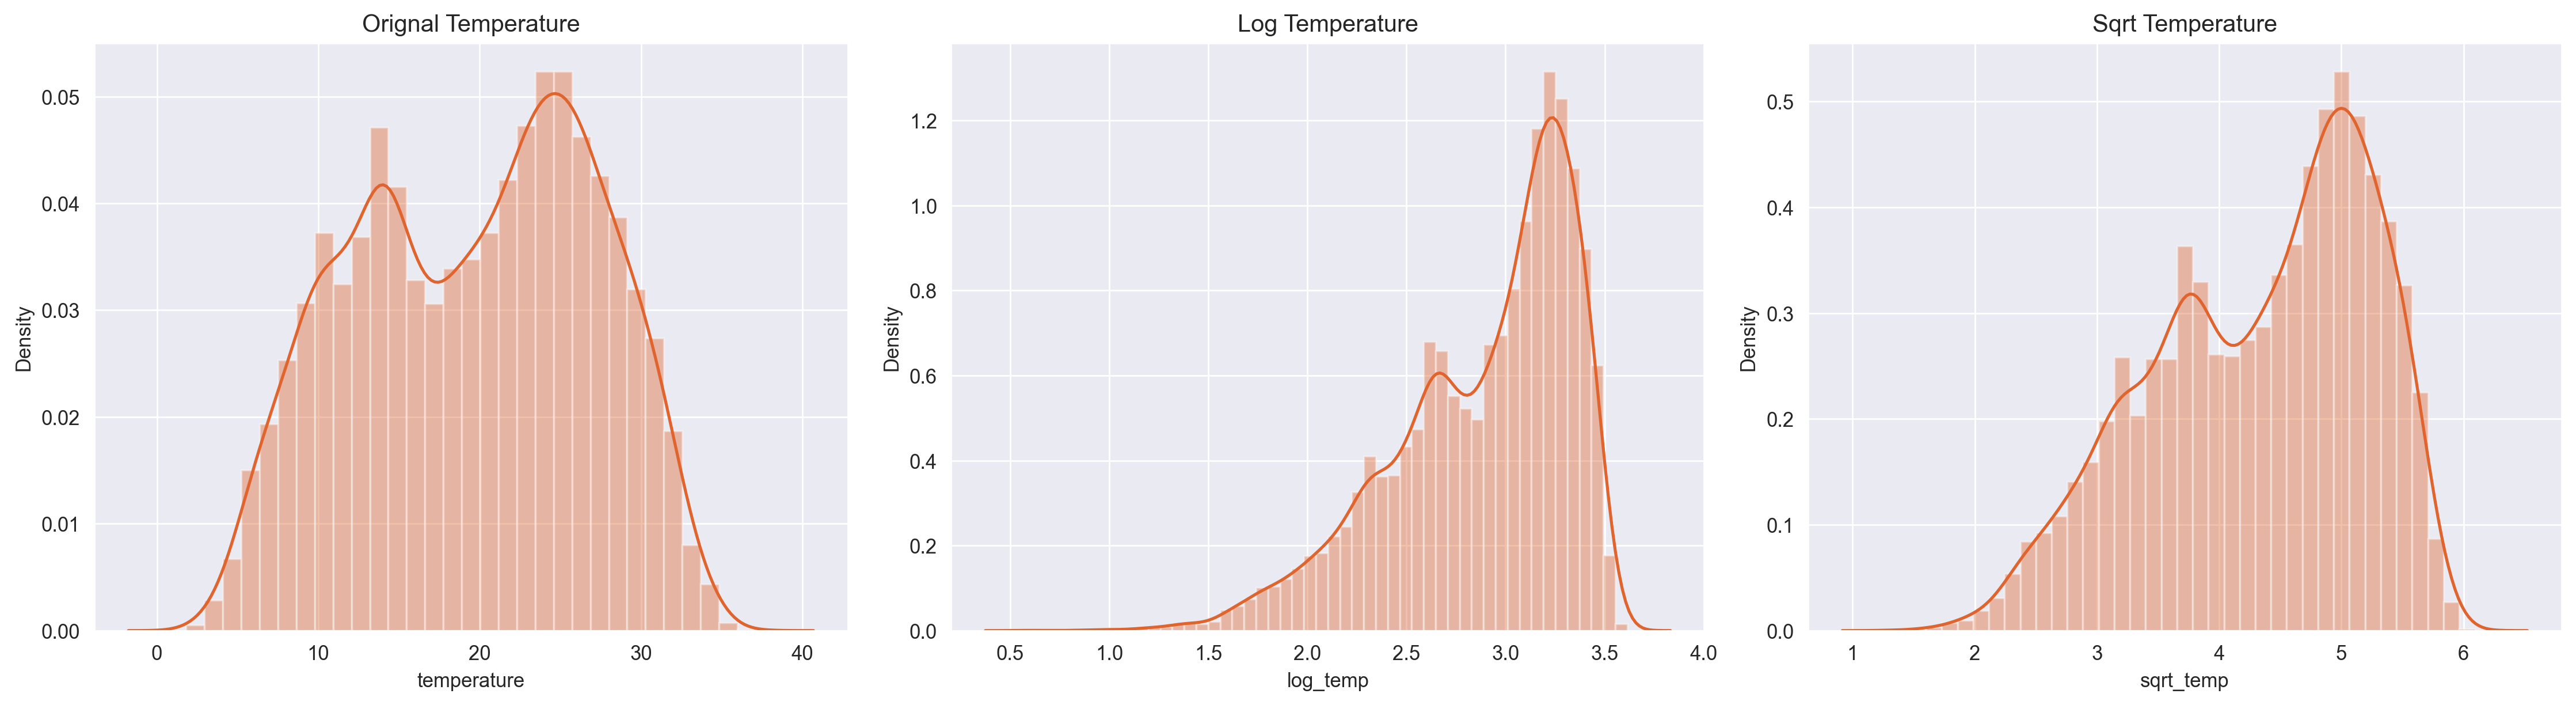

In [36]:
fig, ax = plt.subplots(ncols = 3, figsize = [18,5])

plt.setp(ax[0], title = 'Orignal Temperature')
sns.distplot(ep['temperature'], ax = ax[0], color = '#E0642E')

plt.setp(ax[1], title = 'Log Temperature')
sns.distplot(ep['log_temp'], ax = ax[1], color = '#E0642E')

plt.setp(ax[2], title = 'Sqrt Temperature')
sns.distplot(ep['sqrt_temp'], ax = ax[2], color = '#E0642E')

plt.tight_layout()

#### Tranforming Exhaust Vacuum

In [37]:
ep['log_ev'] = ep['exhaust_vacuum'].apply(mt.log)
ep['sqrt_ev'] = ep['exhaust_vacuum'].apply(mt.sqrt)

ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
0            9.59           38.56       1017.01       60.10   
1           12.04           42.34       1019.72       94.67   
2           13.87           45.08       1024.42       81.69   
3           13.72           54.30       1017.89       79.08   
4           15.14           49.64       1023.78       75.00   
...           ...             ...           ...         ...   
9522        17.10           49.69       1005.53       81.82   
9523        24.73           65.34       1015.42       52.80   
9524        30.44           56.24       1005.19       56.24   
9525        23.00           66.05       1020.61       80.29   
9526        17.75           49.25       1020.86       63.67   

      energy_production  log_temp  sqrt_temp    log_ev   sqrt_ev  
0                481.30  2.260721   3.096773  3.652215  6.209670  
1                465.36  2.488234   3.469870  3.745732  6.506919  
2                465.48  2.629728   3.724245  3.808439  6.714164  
3                467.05  2.618855   3.704052  3.994524  7.368853  
4                463.58  2.717340   3.891015  3.904797  7.045566  
...                 ...       ...        ...       ...       ...  
9522             457.32  2.839078   4.135215  3.905804  7.049113  
9523             446.92  3.208017   4.972927  4.179604  8.083316  
9524             429.34  3.415758   5.517246  4.029628  7.499333  
9525             421.57  3.135494   4.795832  4.190412  8.127115  
9526             454.41  2.876386   4.213075  3.896909  7.017834  

[9527 rows x 9 columns]

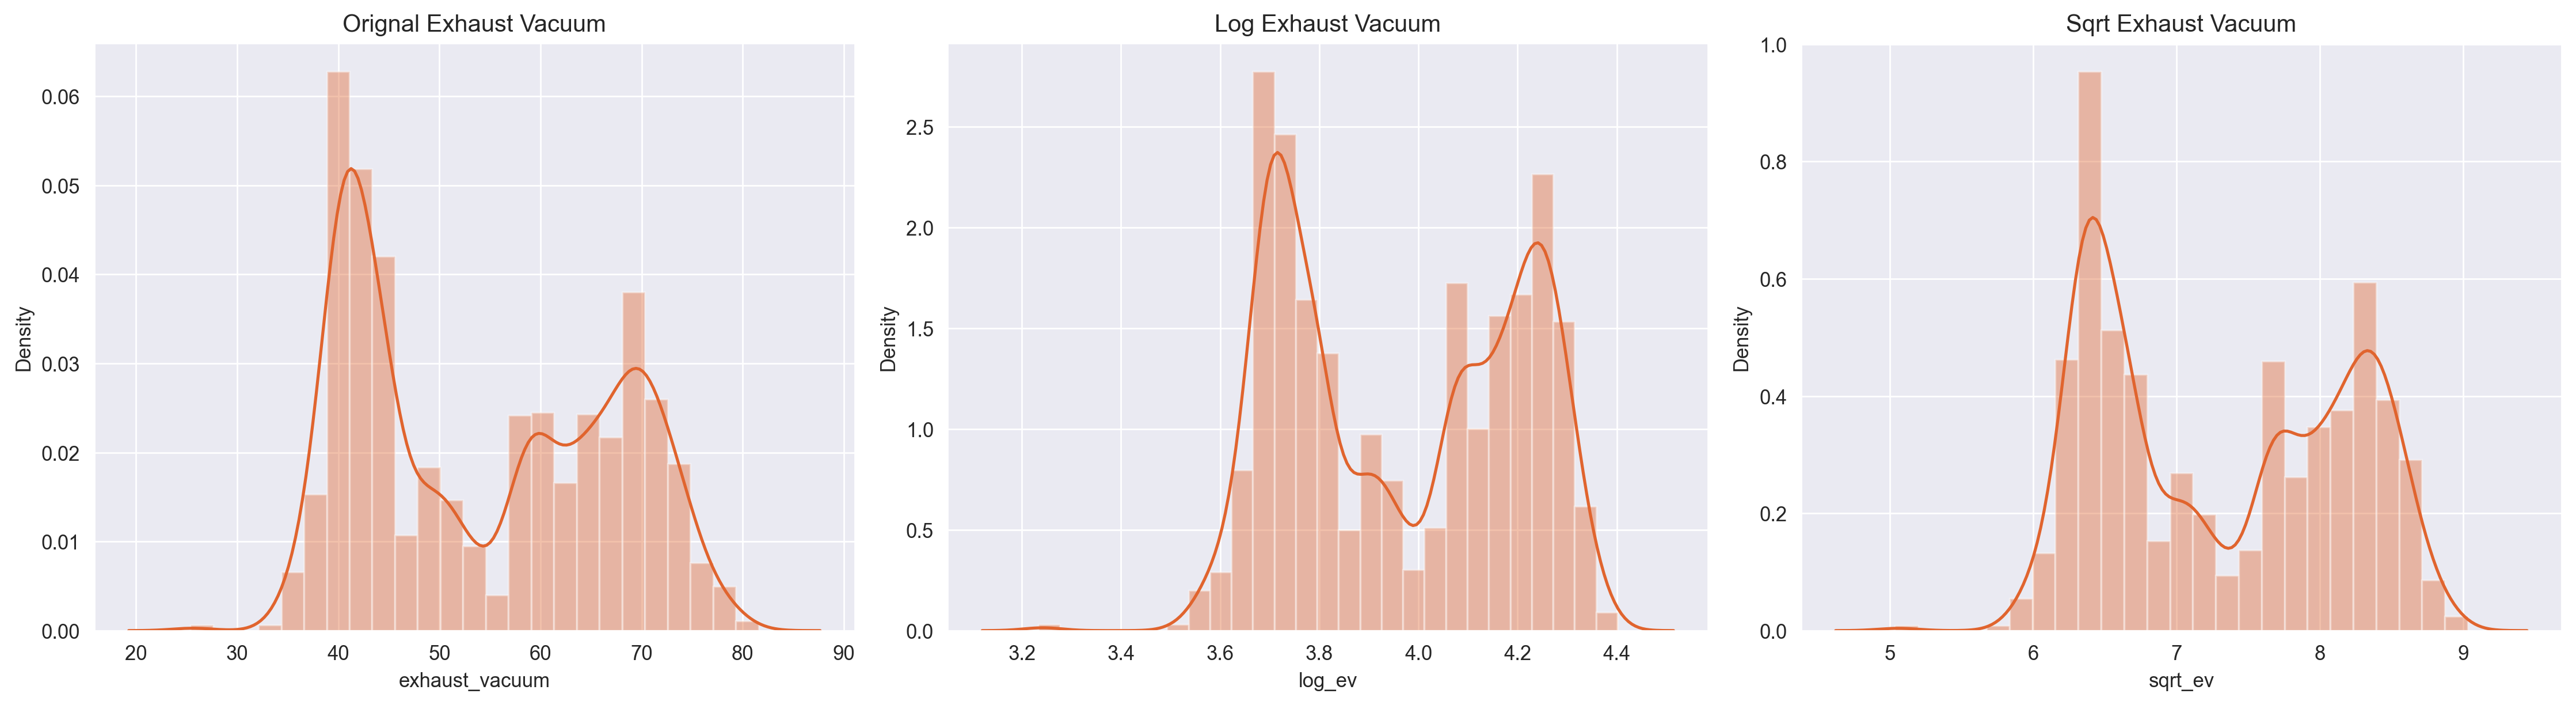

In [38]:
fig, ax = plt.subplots(ncols = 3, figsize = [18,5])

plt.setp(ax[0], title = 'Orignal Exhaust Vacuum')
sns.distplot(ep['exhaust_vacuum'], ax = ax[0], color = '#E0642E')

plt.setp(ax[1], title = 'Log Exhaust Vacuum')
sns.distplot(ep['log_ev'], ax = ax[1], color = '#E0642E')

plt.setp(ax[2], title = 'Sqrt Exhaust Vacuum')
sns.distplot(ep['sqrt_ev'], ax = ax[2], color = '#E0642E')

plt.tight_layout()

#### Tranforming Ambient Pressure

In [39]:
ep['log_ap'] = ep['amb_pressure'].apply(mt.log)
ep['sqrt_ap'] = ep['amb_pressure'].apply(mt.sqrt)

ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
0            9.59           38.56       1017.01       60.10   
1           12.04           42.34       1019.72       94.67   
2           13.87           45.08       1024.42       81.69   
3           13.72           54.30       1017.89       79.08   
4           15.14           49.64       1023.78       75.00   
...           ...             ...           ...         ...   
9522        17.10           49.69       1005.53       81.82   
9523        24.73           65.34       1015.42       52.80   
9524        30.44           56.24       1005.19       56.24   
9525        23.00           66.05       1020.61       80.29   
9526        17.75           49.25       1020.86       63.67   

      energy_production  log_temp  sqrt_temp    log_ev   sqrt_ev    log_ap  \
0                481.30  2.260721   3.096773  3.652215  6.209670  6.924622   
1                465.36  2.488234   3.469870  3.745732  6.506919  6.927283   
2                465.48  2.629728   3.724245  3.808439  6.714164  6.931882   
3                467.05  2.618855   3.704052  3.994524  7.368853  6.925487   
4                463.58  2.717340   3.891015  3.904797  7.045566  6.931257   
...                 ...       ...        ...       ...       ...       ...   
9522             457.32  2.839078   4.135215  3.905804  7.049113  6.913270   
9523             446.92  3.208017   4.972927  4.179604  8.083316  6.923058   
9524             429.34  3.415758   5.517246  4.029628  7.499333  6.912932   
9525             421.57  3.135494   4.795832  4.190412  8.127115  6.928156   
9526             454.41  2.876386   4.213075  3.896909  7.017834  6.928401   

        sqrt_ap  
0     31.890594  
1     31.933055  
2     32.006562  
3     31.904388  
4     31.996562  
...         ...  
9522  31.710093  
9523  31.865655  
9524  31.704732  
9525  31.946987  
9526  31.950900  

[9527 rows x 11 columns]

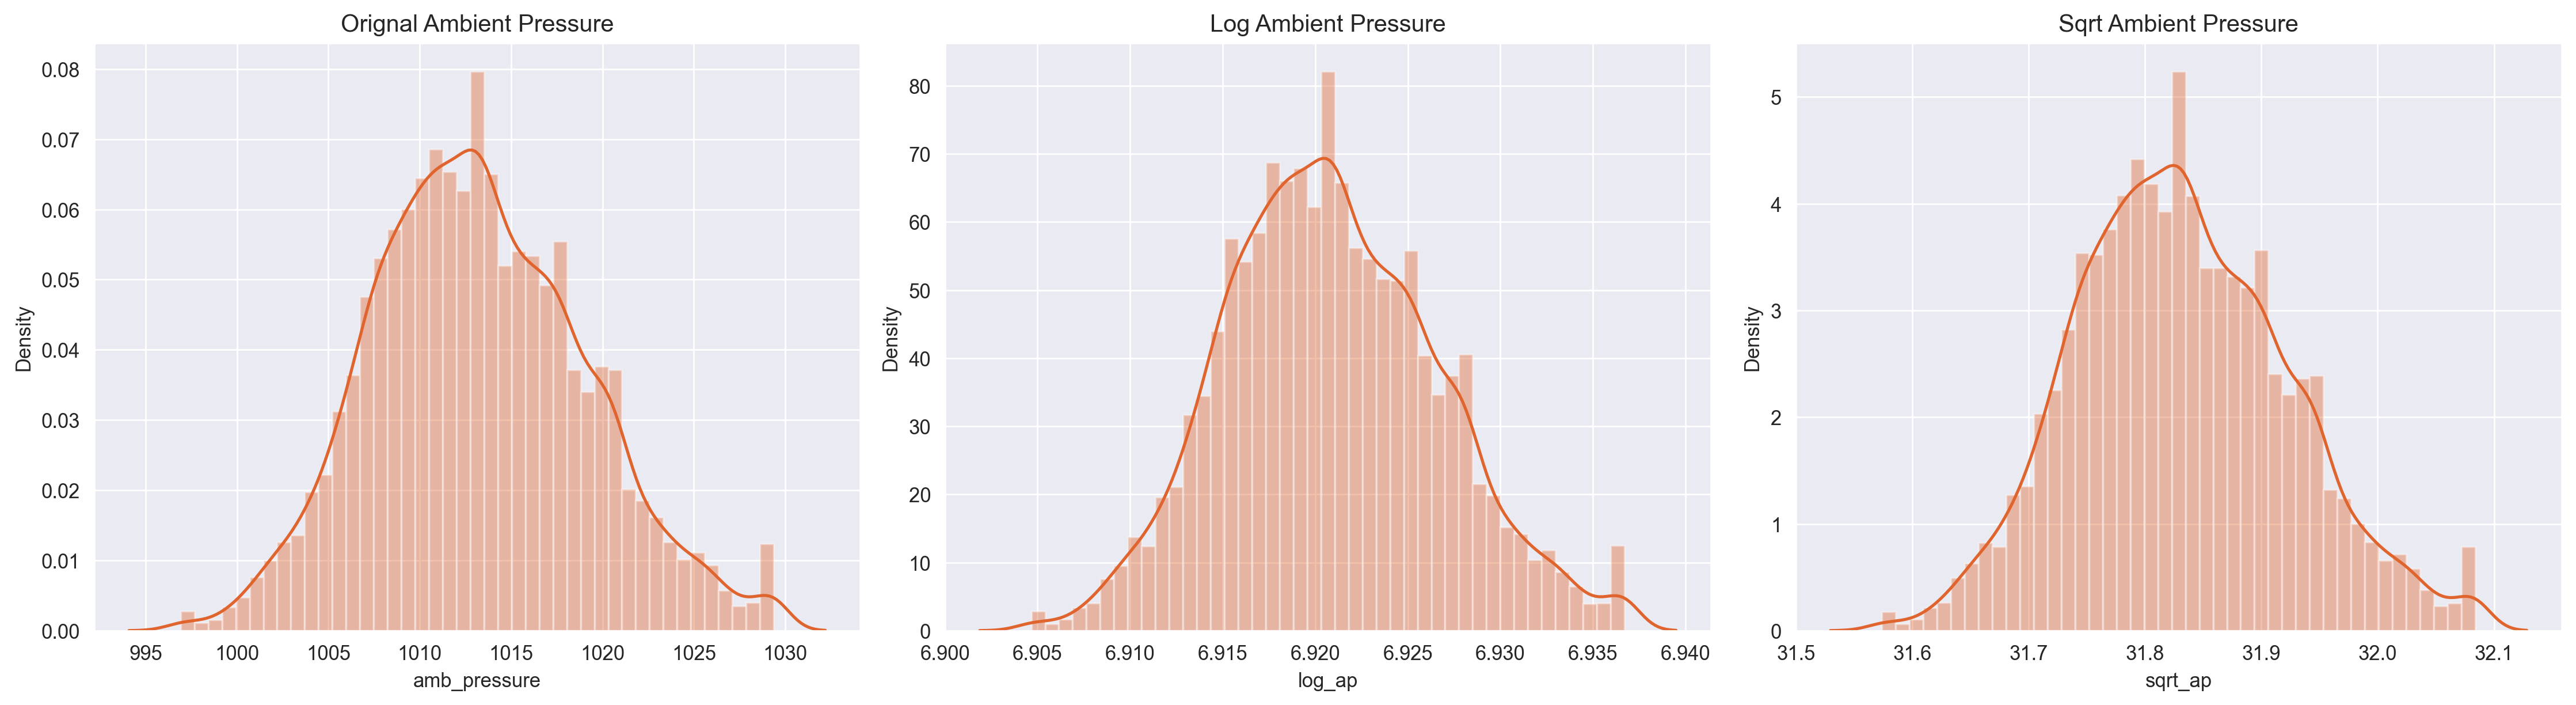

In [40]:
fig, ax = plt.subplots(ncols = 3, figsize = [18,5])

plt.setp(ax[0], title = 'Orignal Ambient Pressure')
sns.distplot(ep['amb_pressure'], ax = ax[0], color = '#E0642E')

plt.setp(ax[1], title = 'Log Ambient Pressure')
sns.distplot(ep['log_ap'], ax = ax[1], color = '#E0642E')

plt.setp(ax[2], title = 'Sqrt Ambient Pressure')
sns.distplot(ep['sqrt_ap'], ax = ax[2], color = '#E0642E')

plt.tight_layout()

#### Tranforming Relative Humidity

In [41]:
ep['log_rh'] = ep['r_humidity'].apply(mt.log)
ep['sqrt_rh'] = ep['r_humidity'].apply(mt.sqrt)

ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
0            9.59           38.56       1017.01       60.10   
1           12.04           42.34       1019.72       94.67   
2           13.87           45.08       1024.42       81.69   
3           13.72           54.30       1017.89       79.08   
4           15.14           49.64       1023.78       75.00   
...           ...             ...           ...         ...   
9522        17.10           49.69       1005.53       81.82   
9523        24.73           65.34       1015.42       52.80   
9524        30.44           56.24       1005.19       56.24   
9525        23.00           66.05       1020.61       80.29   
9526        17.75           49.25       1020.86       63.67   

      energy_production  log_temp  sqrt_temp    log_ev   sqrt_ev    log_ap  \
0                481.30  2.260721   3.096773  3.652215  6.209670  6.924622   
1                465.36  2.488234   3.469870  3.745732  6.506919  6.927283   
2                465.48  2.629728   3.724245  3.808439  6.714164  6.931882   
3                467.05  2.618855   3.704052  3.994524  7.368853  6.925487   
4                463.58  2.717340   3.891015  3.904797  7.045566  6.931257   
...                 ...       ...        ...       ...       ...       ...   
9522             457.32  2.839078   4.135215  3.905804  7.049113  6.913270   
9523             446.92  3.208017   4.972927  4.179604  8.083316  6.923058   
9524             429.34  3.415758   5.517246  4.029628  7.499333  6.912932   
9525             421.57  3.135494   4.795832  4.190412  8.127115  6.928156   
9526             454.41  2.876386   4.213075  3.896909  7.017834  6.928401   

        sqrt_ap    log_rh   sqrt_rh  
0     31.890594  4.096010  7.752419  
1     31.933055  4.550397  9.729851  
2     32.006562  4.402932  9.038252  
3     31.904388  4.370460  8.892694  
4     31.996562  4.317488  8.660254  
...         ...       ...       ...  
9522  31.710093  4.404522  9.045441  
9523  31.865655  3.966511  7.266361  
9524  31.704732  4.029628  7.499333  
9525  31.946987  4.385645  8.960469  
9526  31.950900  4.153713  7.979348  

[9527 rows x 13 columns]

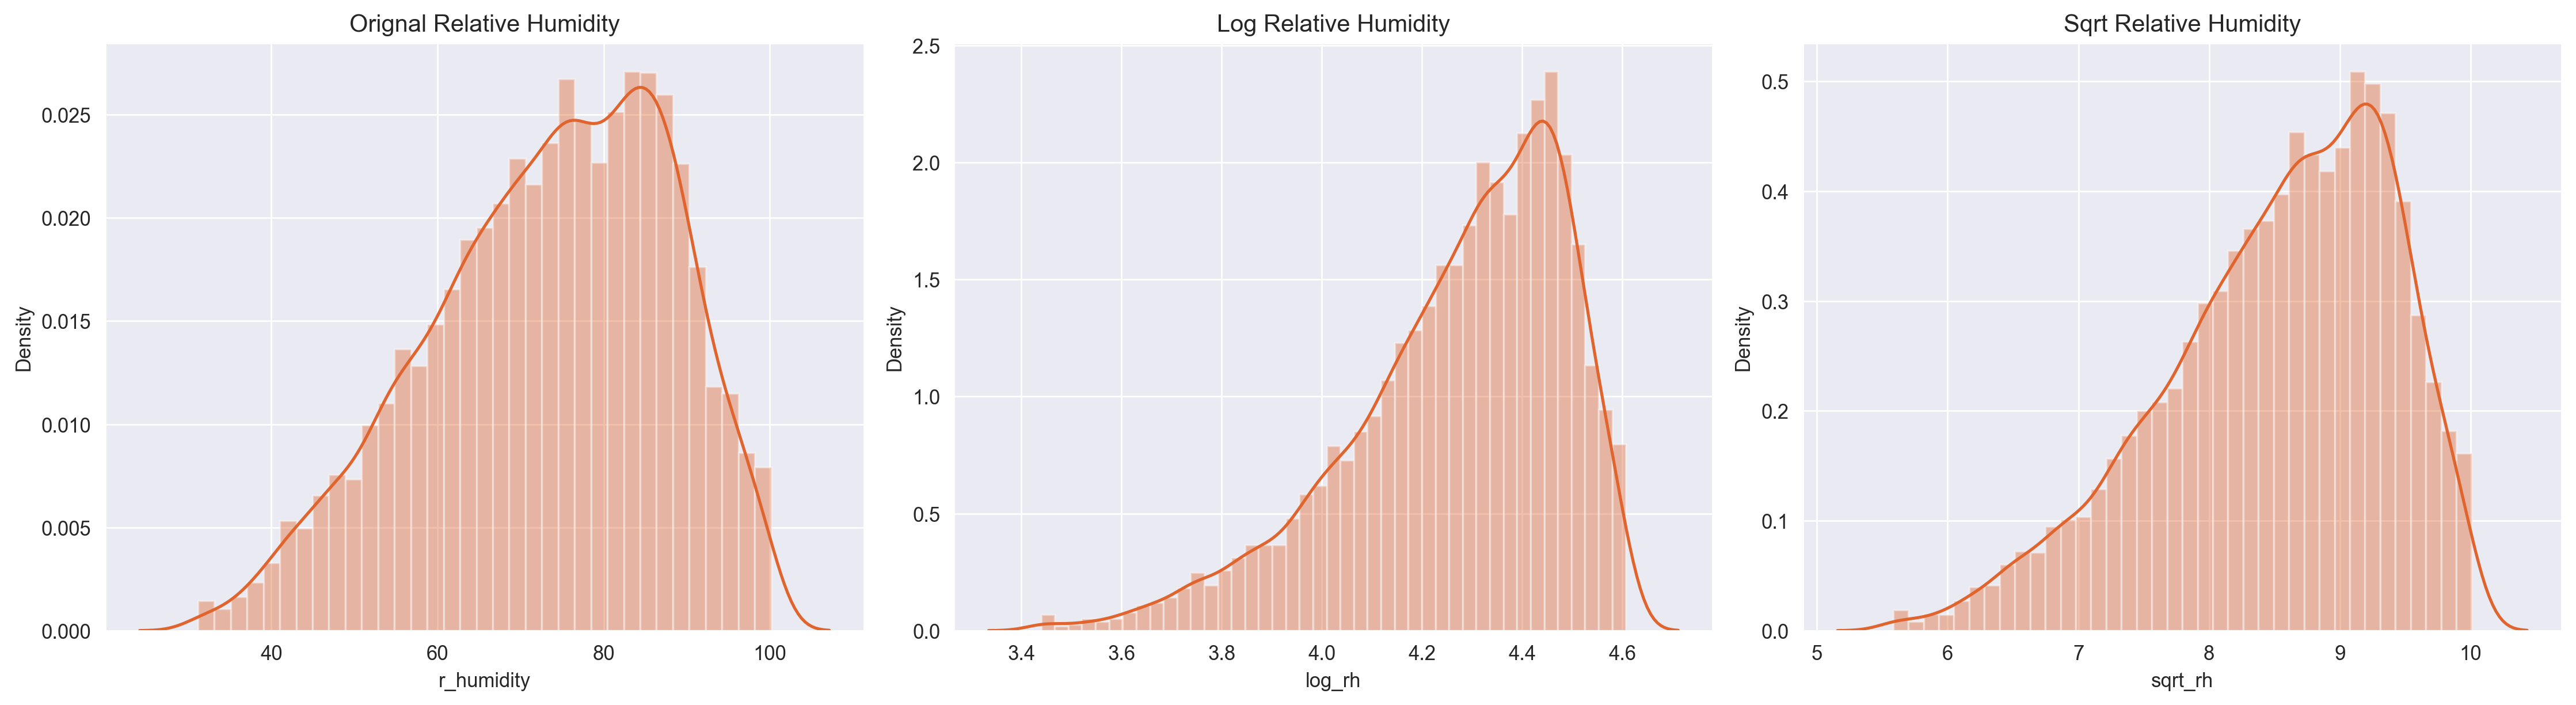

In [42]:
fig, ax = plt.subplots(ncols = 3, figsize = [18,5])

plt.setp(ax[0], title = 'Orignal Relative Humidity')
sns.distplot(ep['r_humidity'], ax = ax[0], color = '#E0642E')

plt.setp(ax[1], title = 'Log Relative Humidity')
sns.distplot(ep['log_rh'], ax = ax[1], color = '#E0642E')

plt.setp(ax[2], title = 'Sqrt Relative Humidity')
sns.distplot(ep['sqrt_rh'], ax = ax[2], color = '#E0642E')

plt.tight_layout()

## Exporting Dataframe

In [44]:
ep.to_csv('EDA.csv', index=False)